# Gaussian experiment
All data is generated on the fly

In [7]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
import scipy.stats
import os
import sobol
import resource
import json

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""


# Setup

In [9]:
def generate_sobol_points(M, dim):
    points = []
    for i in range(M):
        points.append(sobol.i4_sobol(dim,i)[0])
    return np.array(points)

dim = 6
M = int(2**15)

data_sources = {"Monte Carlo": np.random.uniform(0, 1, (M,dim)),
                "QMC Sobol" : generate_sobol_points(M, dim),
                "MC Normal" : np.random.normal(0,1, (M, dim))}

def sine_functional(x):
    return np.sum(np.sin(4*np.pi*x), 1)
def normal_functional(x):
    return scipy.stats.norm.ppf(x)

def sum_functional(x):
    return np.sum(x, 1)

functionals = {"Sum": sum_functional,
               "Sine" : sine_functional,
               "Sine Normal" : lambda x : sine_functional(normal_functional(x)),
               "Sum Normal" : lambda x: sum_functional(normal_functional(x))
               }


with open("gaussian_network_config.json") as gaussian_config_file:
    gaussian_config = json.load(gaussian_config_file)
    network_width = int(gaussian_config['width'])
    network_depth = int(gaussian_config['depth'])
    
gaussian_network =  [network_width for k in range(network_depth)]
gaussian_network.append(1)

epochs = 50000

print(gaussian_network)
console_log(gaussian_network)


[12, 12, 12, 12, 12, 1]


# Training setup

In [3]:
def train(*, parameters, samples, title):
    train_sizes = [ 128, 512]
    
    optimizers = {"SGD": keras.optimizers.SGD,
                 "Adam": keras.optimizers.Adam}
    
    losses = ["mean_squared_error"]
    
    for optimizer in optimizers.keys():
        for loss in losses:
            display(HTML("<h1>{}: Computed with {} with {}</h1>".format(title, optimizer, loss)))
    
    
            for train_size in train_sizes:
                tables = Tables.make_default()
                batch_size = train_size
                validation_size=train_size
                
                
                
                network_information = NetworkInformation(optimizer=optimizers[optimizer], epochs=epochs, 
                                                             network=gaussian_network, train_size=train_size,
                                                             validation_size=validation_size,
                                                            loss=loss, tries=1)
                    
                output_information = OutputInformation(tables=tables, title=title,
                                                          short_title=title)
                showAndSave.prefix='%s_%s_%s_ts_%d_bs_%d' %(title, optimizer, loss, batch_size, train_size)
                get_network_and_postprocess(parameters, samples, network_information = network_information,
                        output_information = output_information)
                
                showAndSave.prefix='%s_%s_%s_all_ts_%d_bs_%d' %(title, optimizer, loss, batch_size, train_size)
                tables.write_tables()
            
    

# Training


Training took 375.15223503112793 seconds


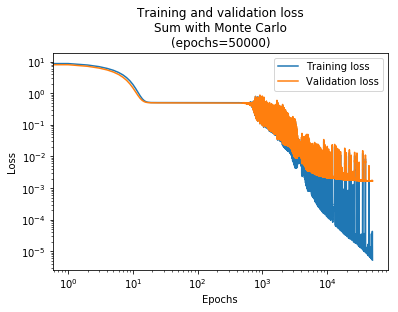

Best network index: 0
Total learning time took: 377 s


###################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_128_bs_128_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##########################################################

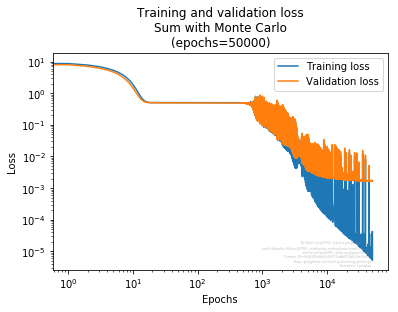

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


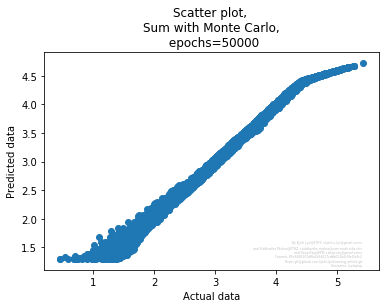

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_4 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_5 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_6 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_7 (Dense)              (None, 48)                2352      
__________

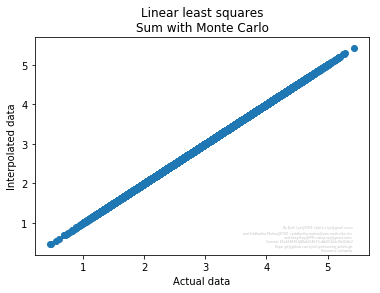

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


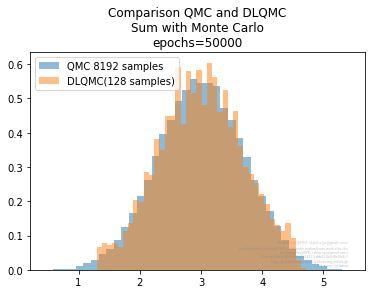

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


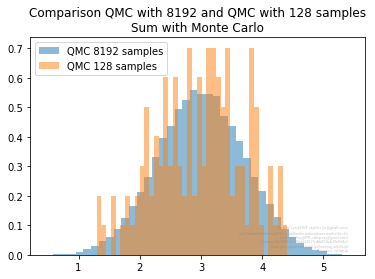

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


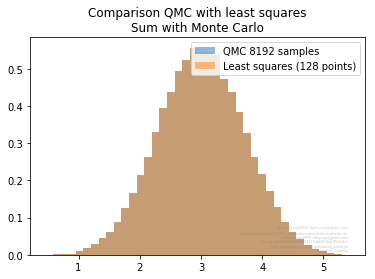

Memory usage: 516356
Memory usage: 516356
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


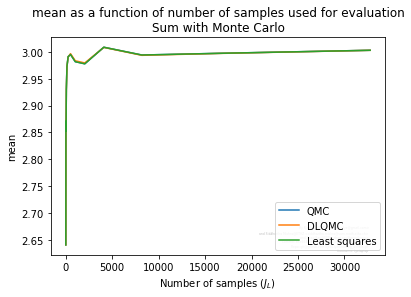

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


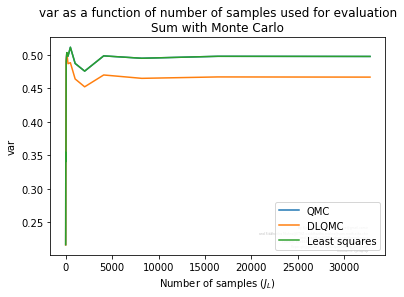

Memory usage: 516356
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


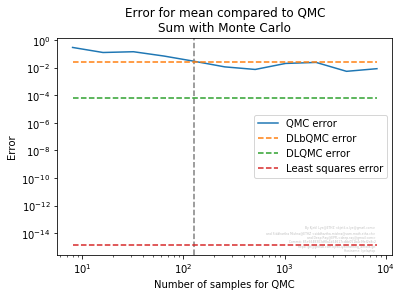

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


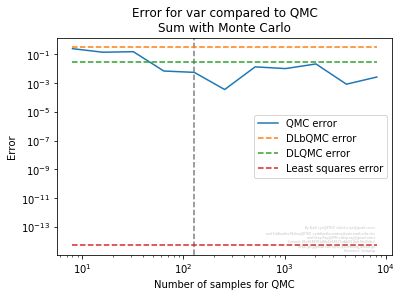

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


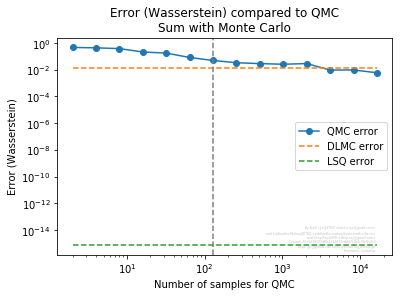



#############################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
#############################################################################
--------------------  -------  -------  ------------------  ------------------  ------------------  -------------------  ------------------  ------------------
                      QMC 128  QMC 128  DLQMC               DLQMC               DLbQMC              DLbQMC               Least squares       Least squares
                      mean     var      mean                var                 mean                var                  mean                var
Sum with Monte Carlo  1.0      1.0      453.30435209436166  0.1846742566800407  1.0855307035527033  0.01842542997109484  22733579007055.332  1069494423436.3334
--------------------  -------  -------  ------------------  ------------------  ------------------  -------------------  ------------------  ---

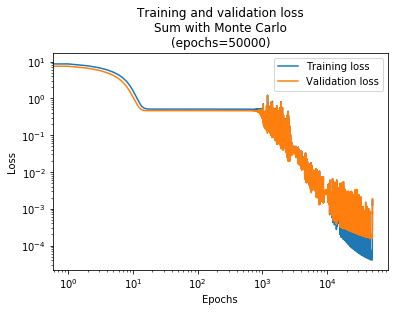

Best network index: 0
Total learning time took: 798 s


###################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_ts_512_bs_512_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##########################################################

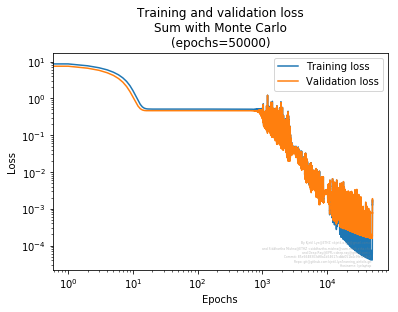

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


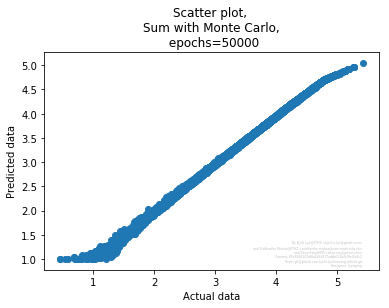

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 48)                336       
_________________________________________________________________
dense_35 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_36 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_37 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_38 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_39 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_40 (Dense)             (None, 48)                2352      
__________

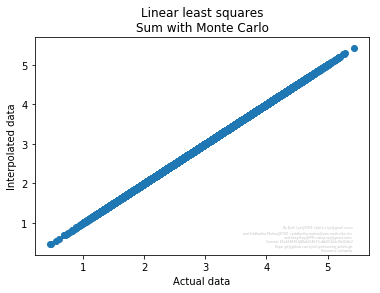

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


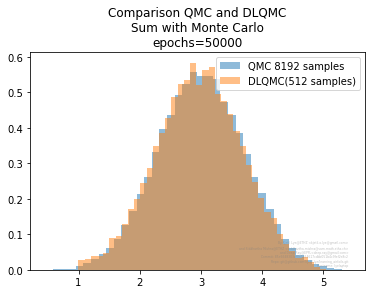

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


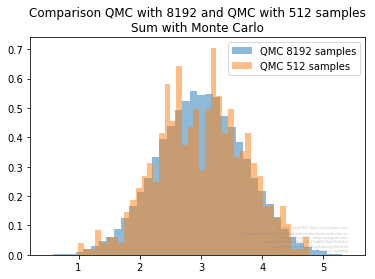

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


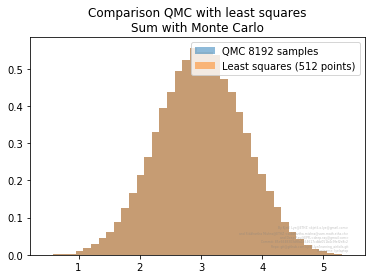

Memory usage: 585832
Memory usage: 585832
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


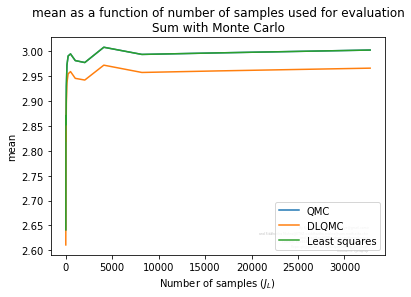

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


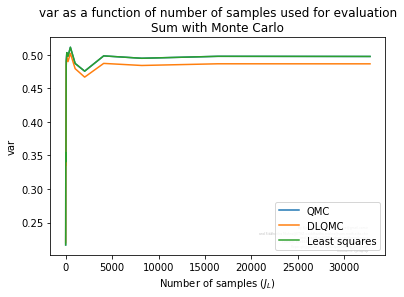

Memory usage: 585832
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


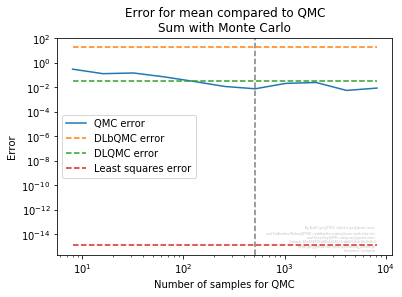

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


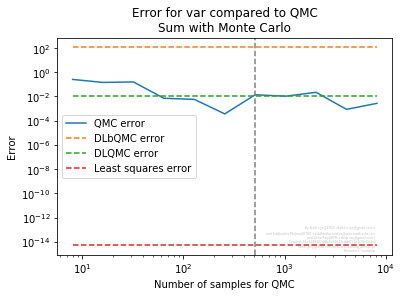

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


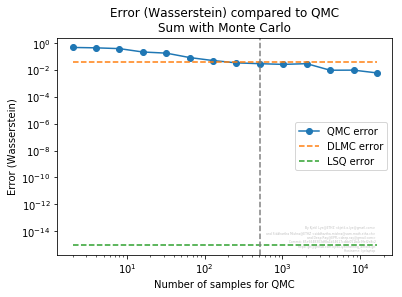



#############################################################################
#Sum with Monte Carlo_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
#############################################################################
--------------------  -------  -------  ------------------  ------------------  ----------------------  ----------------------  -----------------  ------------------
                      QMC 512  QMC 512  DLQMC               DLQMC               DLbQMC                  DLbQMC                  Least squares      Least squares
                      mean     var      mean                var                 mean                    var                     mean               var
Sum with Monte Carlo  1.0      1.0      0.2122147794502333  1.2499207022612442  0.00042356758567515184  0.00012417316815943664  5804006047809.333  2579608692525.6665
--------------------  -------  -------  ------------------  ------------------  ----------------------  ----------------


Training took 404.02902364730835 seconds


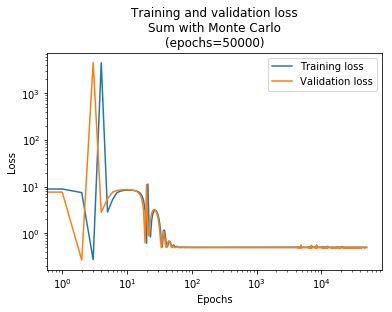

Best network index: 0
Total learning time took: 405 s


####################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_ts_128_bs_128_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#######################################################

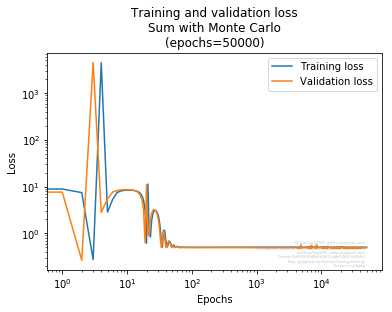

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


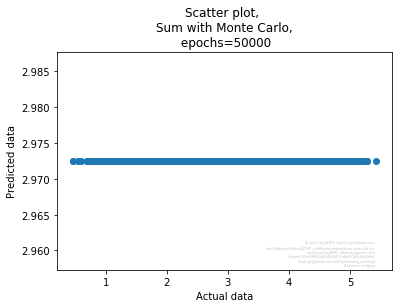

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 48)                336       
_________________________________________________________________
dense_68 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_69 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_70 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_71 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_72 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_73 (Dense)             (None, 48)                2352      
__________

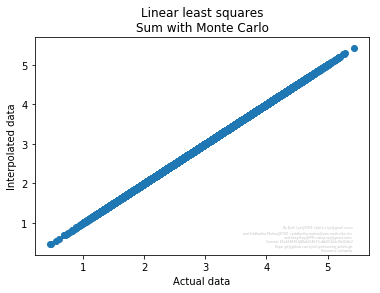

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


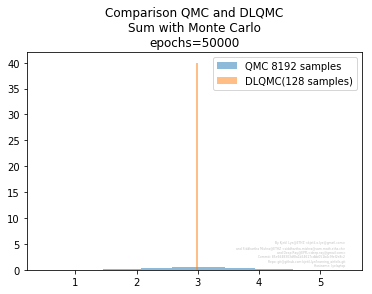

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


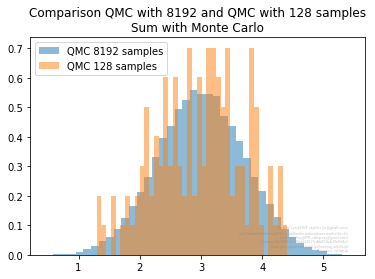

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


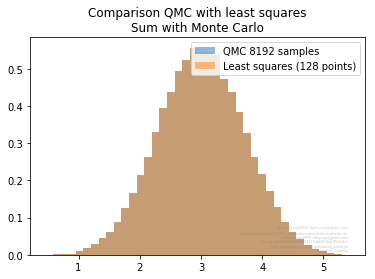

Memory usage: 626540
Memory usage: 626540
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


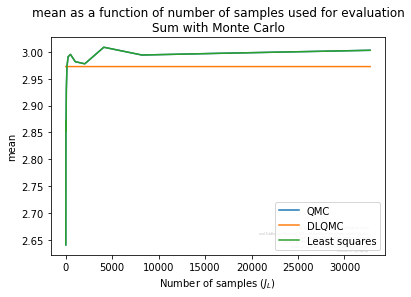

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


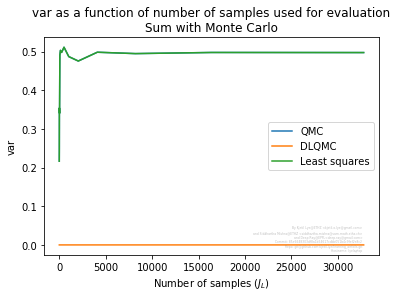

Memory usage: 626540
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


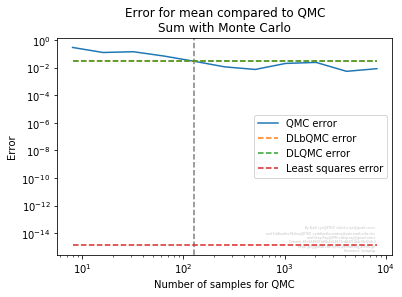

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


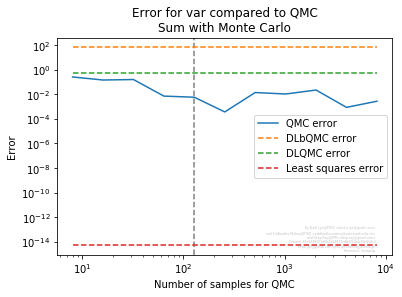

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


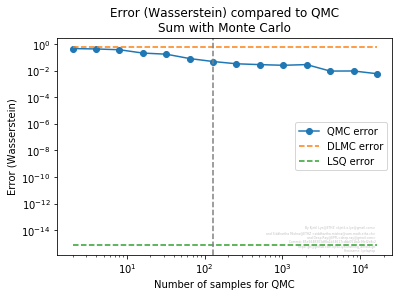



##############################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
##############################################################################
--------------------  -------  -------  ------------------  --------------------  ------------------  ---------------------  ------------------  ------------------
                      QMC 128  QMC 128  DLQMC               DLQMC                 DLbQMC              DLbQMC                 Least squares       Least squares
                      mean     var      mean                var                   mean                var                    mean                var
Sum with Monte Carlo  1.0      1.0      0.9997208806392858  0.011453370770785383  0.9671168302156397  8.913742058399734e-05  22733579007055.332  1069494423436.3334
--------------------  -------  -------  ------------------  --------------------  ------------------  ---------------------  

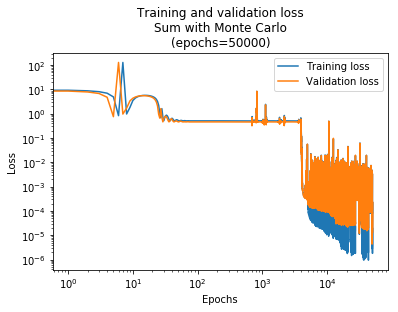

Best network index: 0
Total learning time took: 914 s


####################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_ts_512_bs_512_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#######################################################

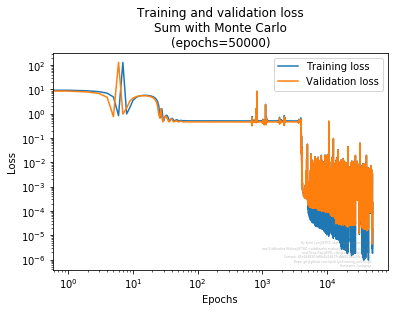

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


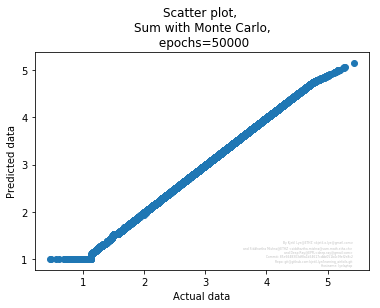

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_101 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_102 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_103 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_104 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_105 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_106 (Dense)            (None, 48)                2352      
__________

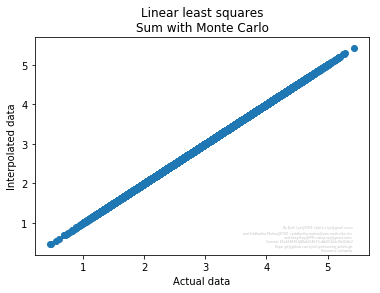

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


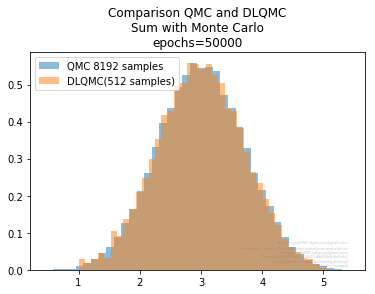

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


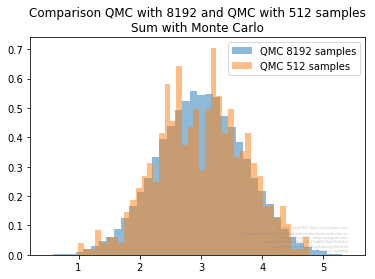

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


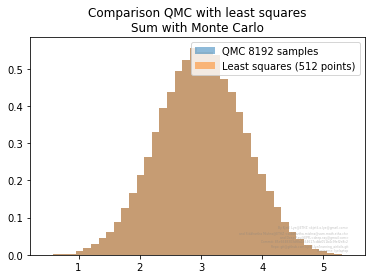

Memory usage: 724668
Memory usage: 724668
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


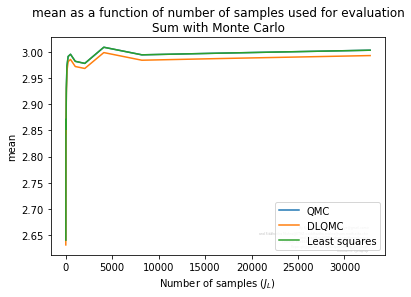

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


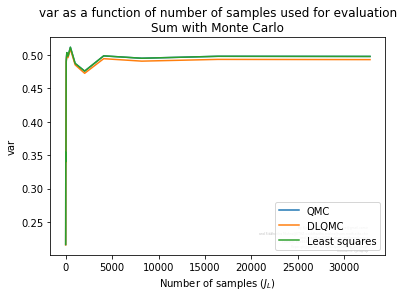

Memory usage: 724668
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


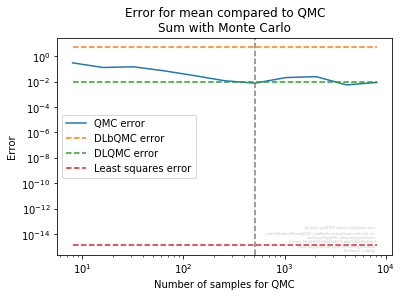

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


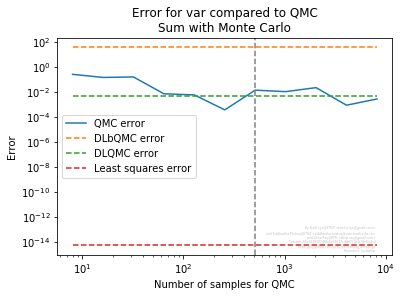

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


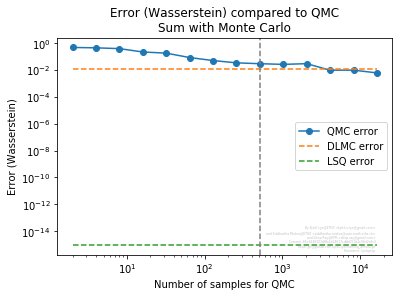



##############################################################################
#Sum with Monte Carlo_Adam_mean_squared_error_all_ts_512_bs_512_speedup_table#
##############################################################################
--------------------  -------  -------  ------------------  ------------------  ---------------------  ---------------------  -----------------  ------------------
                      QMC 512  QMC 512  DLQMC               DLQMC               DLbQMC                 DLbQMC                 Least squares      Least squares
                      mean     var      mean                var                 mean                   var                    mean               var
Sum with Monte Carlo  1.0      1.0      0.7568781769555967  2.9012404608619398  0.0015366301683320724  0.0003798957699779465  5804006047809.333  2579608692525.6665
--------------------  -------  -------  ------------------  ------------------  ---------------------  --------------------- 


Training took 418.25211334228516 seconds


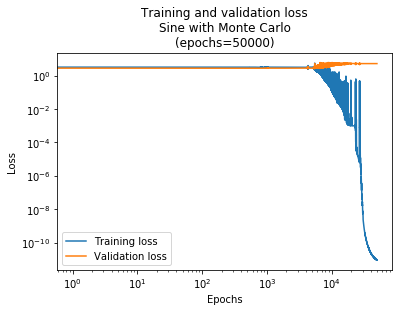

Best network index: 0
Total learning time took: 419 s


####################################################################
#Sine with Monte Carlo_SGD_mean_squared_error_ts_128_bs_128_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#######################################################

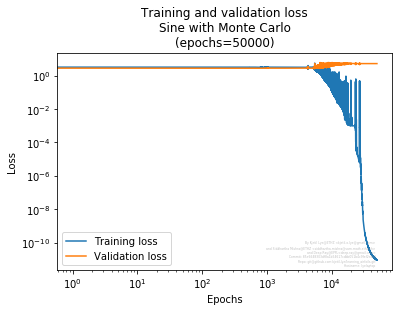

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


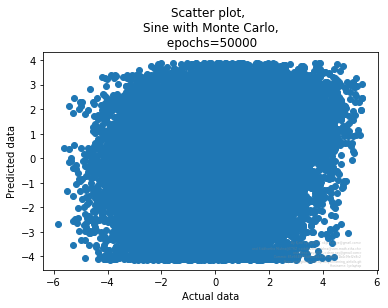

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_134 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_135 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_136 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_137 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_138 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_139 (Dense)            (None, 48)                2352      
__________

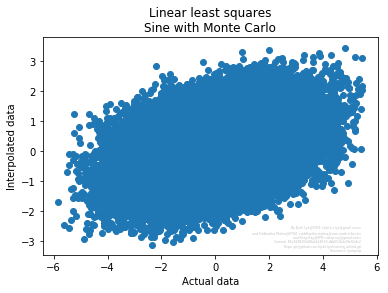

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


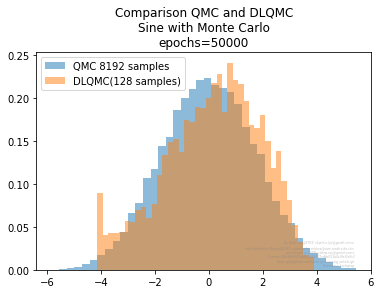

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


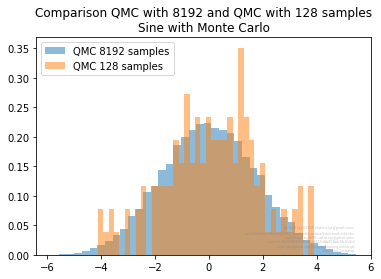

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


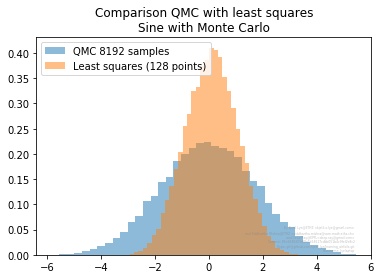

Memory usage: 799016
Memory usage: 799016
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


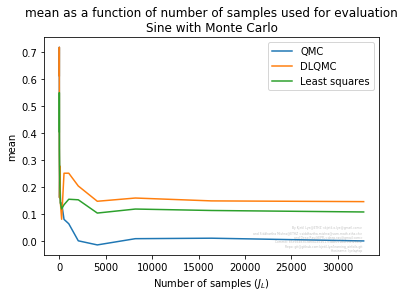

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


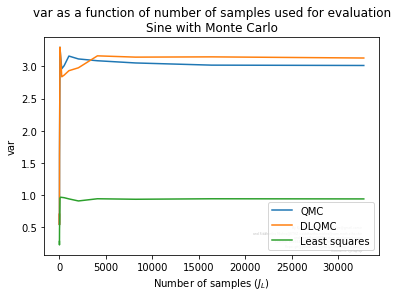

Memory usage: 799016
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


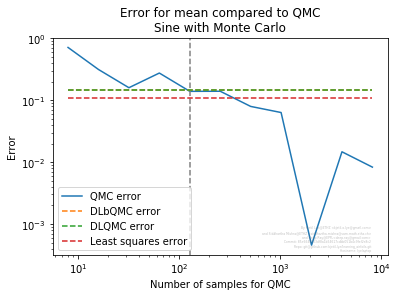

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


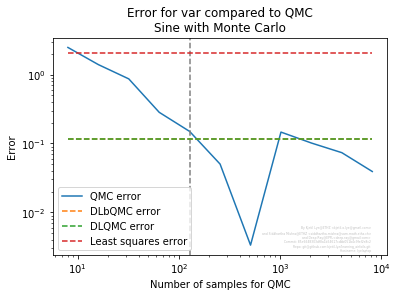

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


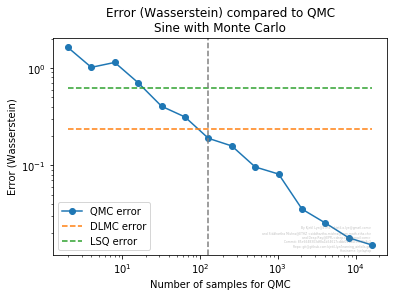



##############################################################################
#Sine with Monte Carlo_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
##############################################################################
---------------------  -------  -------  -----------------  ------------------  ------------------  ------------------  ------------------  -------------------
                       QMC 128  QMC 128  DLQMC              DLQMC               DLbQMC              DLbQMC              Least squares       Least squares
                       mean     var      mean               var                 mean                var                 mean                var
Sine with Monte Carlo  1.0      1.0      0.961927410203873  1.2908342099984949  0.9619415015449989  1.2904734912089888  1.3052978435686795  0.07216406191799565
---------------------  -------  -------  -----------------  ------------------  ------------------  ------------------  ------------------  ---

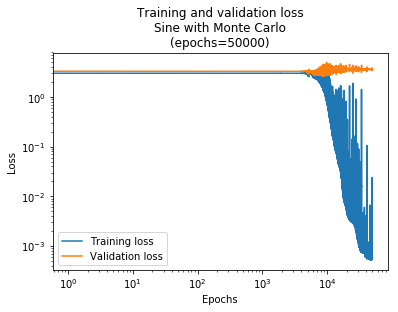

Best network index: 0
Total learning time took: 898 s


####################################################################
#Sine with Monte Carlo_SGD_mean_squared_error_ts_512_bs_512_network#
####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#######################################################

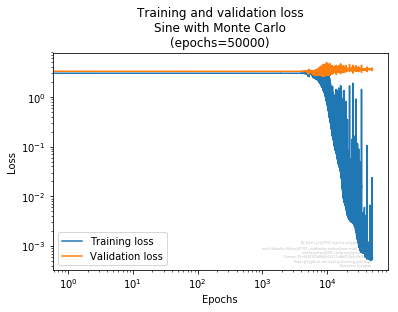

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


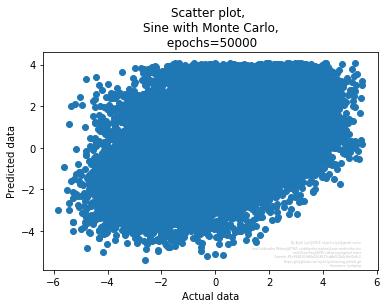

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_167 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_168 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_169 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_170 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_171 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_172 (Dense)            (None, 48)                2352      
__________

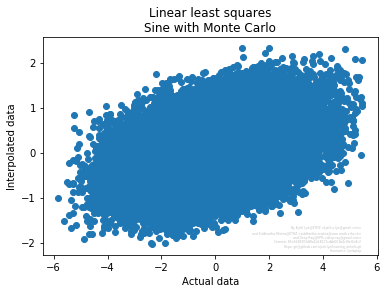

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


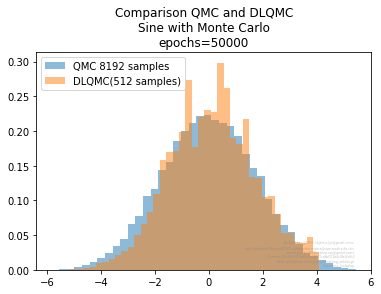

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


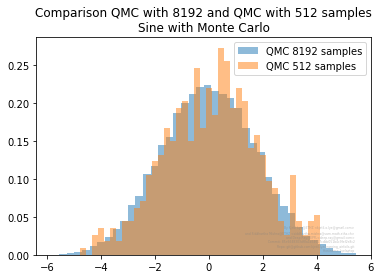

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


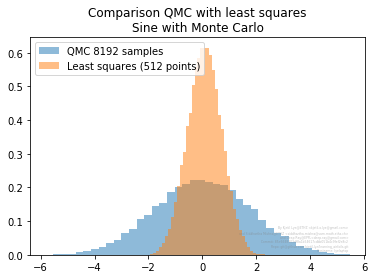

Memory usage: 827700
Memory usage: 827700
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


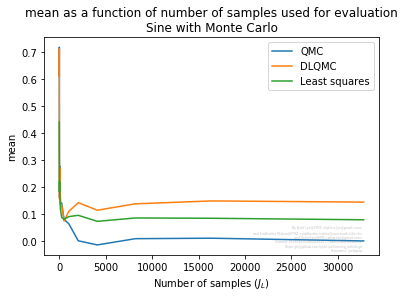

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


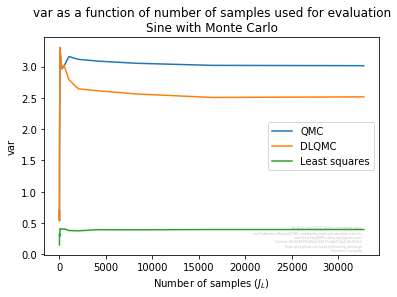

Memory usage: 827700
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


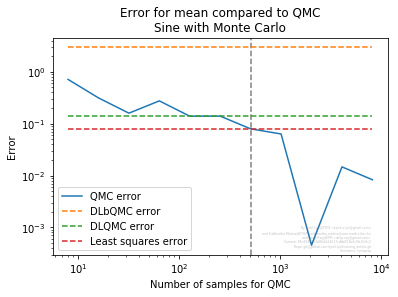

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


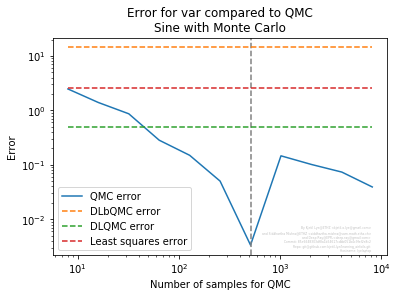

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


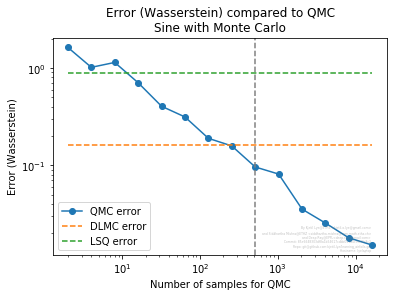



##############################################################################
#Sine with Monte Carlo_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
##############################################################################
---------------------  -------  -------  ------------------  --------------------  --------------------  ----------------------  ------------------  ---------------------
                       QMC 512  QMC 512  DLQMC               DLQMC                 DLbQMC                DLbQMC                  Least squares       Least squares
                       mean     var      mean                var                   mean                  var                     mean                var
Sine with Monte Carlo  1.0      1.0      0.5558480357444536  0.006727744898112404  0.026931188300015303  0.00023381941693648056  1.0194358008940325  0.0012801922841957135
---------------------  -------  -------  ------------------  --------------------  --------------------


Training took 462.51886677742004 seconds


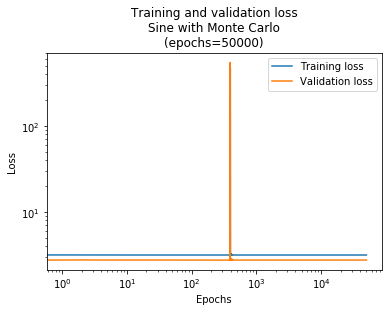

Best network index: 0
Total learning time took: 464 s


#####################################################################
#Sine with Monte Carlo_Adam_mean_squared_error_ts_128_bs_128_network#
#####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
####################################################

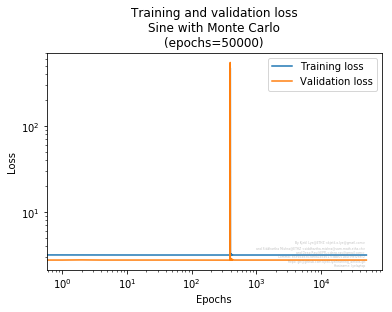

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


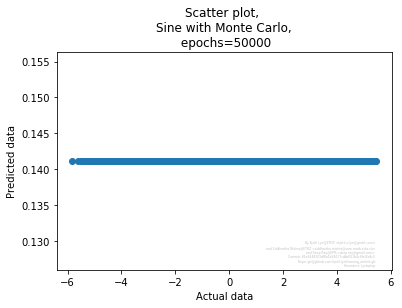

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_200 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_201 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_202 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_203 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_204 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_205 (Dense)            (None, 48)                2352      
__________

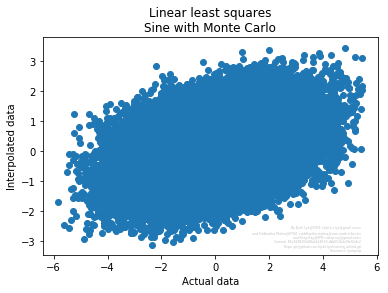

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


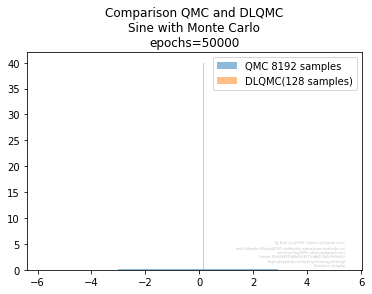

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


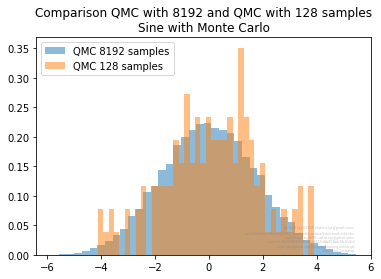

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


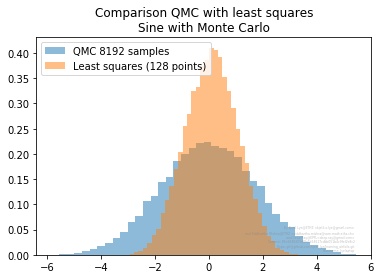

Memory usage: 882060
Memory usage: 882060
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


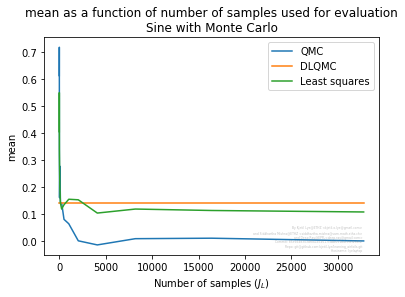

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


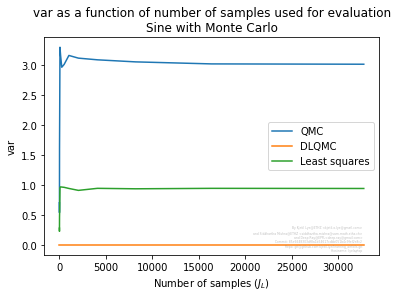

Memory usage: 882060
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


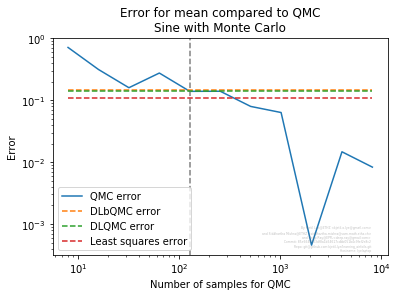

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


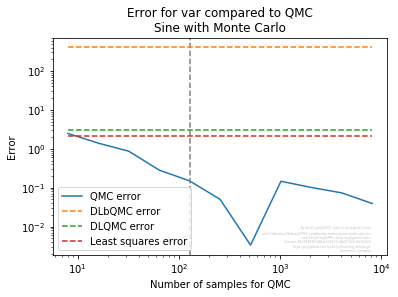

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


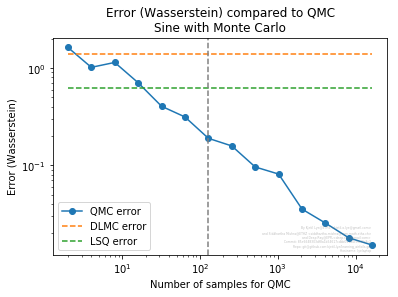



###############################################################################
#Sine with Monte Carlo_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
###############################################################################
---------------------  -------  -------  ------------------  --------------------  ------------------  ---------------------  ------------------  -------------------
                       QMC 128  QMC 128  DLQMC               DLQMC                 DLbQMC              DLbQMC                 Least squares       Least squares
                       mean     var      mean                var                   mean                var                    mean                var
Sine with Monte Carlo  1.0      1.0      0.9997455770581366  0.049624779283863336  0.9682017561064779  0.0003721362206460206  1.3052978435686795  0.07216406191799565
---------------------  -------  -------  ------------------  --------------------  ------------------  -------------

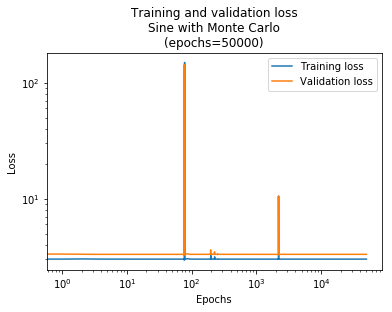

Best network index: 0
Total learning time took: 983 s


#####################################################################
#Sine with Monte Carlo_Adam_mean_squared_error_ts_512_bs_512_network#
#####################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
####################################################

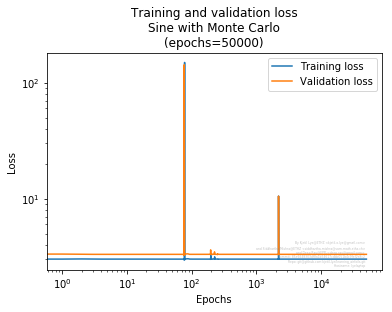

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


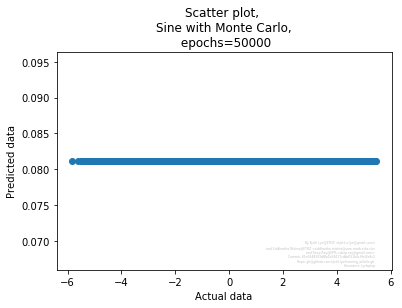

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_233 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_234 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_235 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_236 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_237 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_238 (Dense)            (None, 48)                2352      
__________

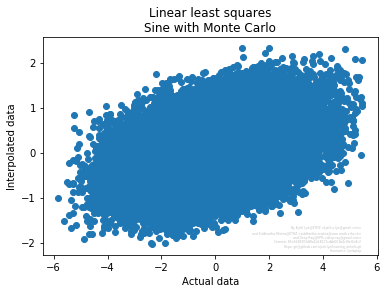

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


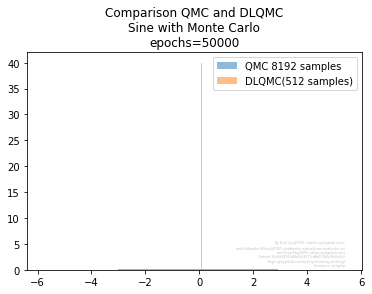

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


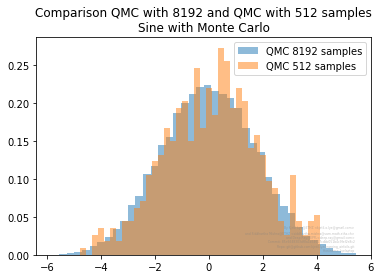

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


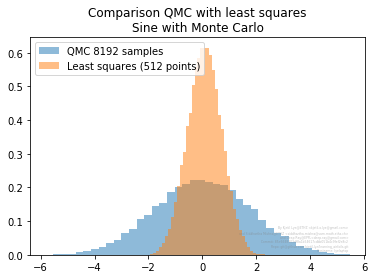

Memory usage: 939072
Memory usage: 939072
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


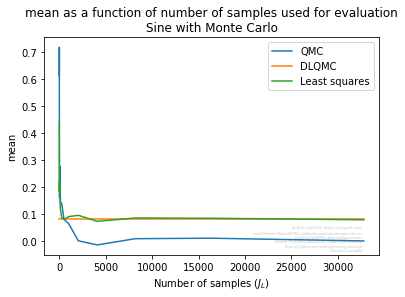

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


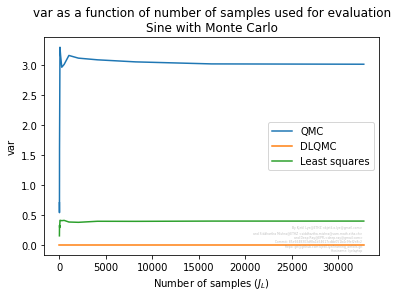

Memory usage: 939072
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


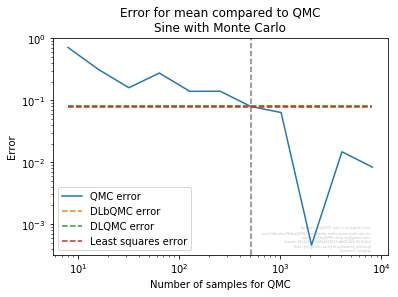

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


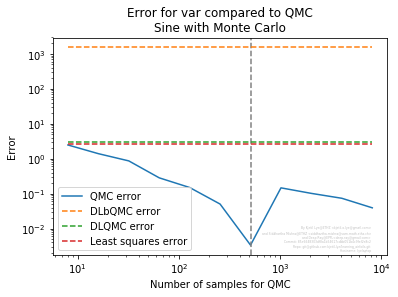

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


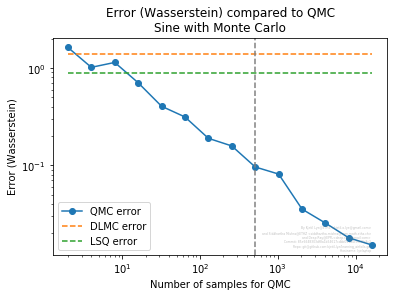



###############################################################################
#Sine with Monte Carlo_Adam_mean_squared_error_all_ts_512_bs_512_speedup_table#
###############################################################################
---------------------  -------  -------  -----------------  --------------------  ------------------  ----------------------  ------------------  ---------------------
                       QMC 512  QMC 512  DLQMC              DLQMC                 DLbQMC              DLbQMC                  Least squares       Least squares
                       mean     var      mean               var                   mean                var                     mean                var
Sine with Monte Carlo  1.0      1.0      1.000000650737564  0.001111295624781216  1.0004298500448108  2.1771710213735884e-06  1.0194358008940325  0.0012801922841957135
---------------------  -------  -------  -----------------  --------------------  ------------------  ----------


Training took 477.1384401321411 seconds


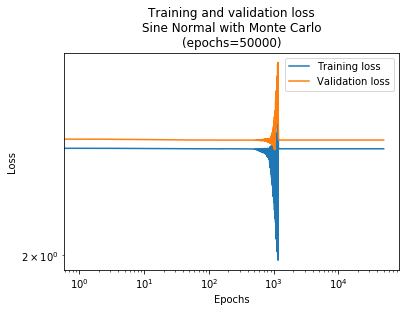

Best network index: 0
Total learning time took: 479 s


###########################################################################
#Sine Normal with Monte Carlo_SGD_mean_squared_error_ts_128_bs_128_network#
###########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##################################

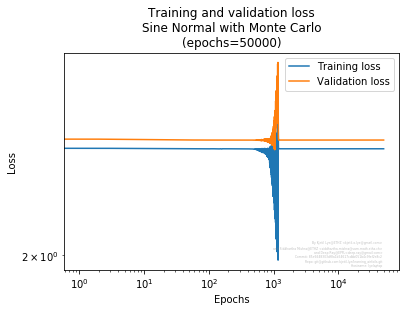

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


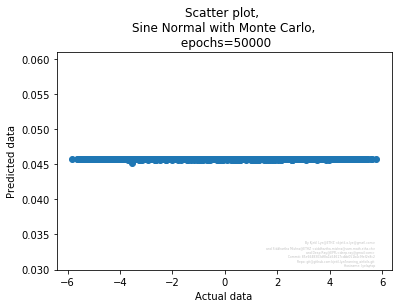

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_266 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_267 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_268 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_269 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_270 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_271 (Dense)            (None, 48)                2352      
__________

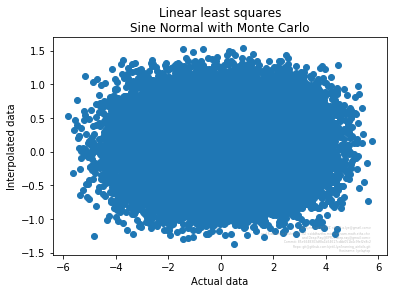

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


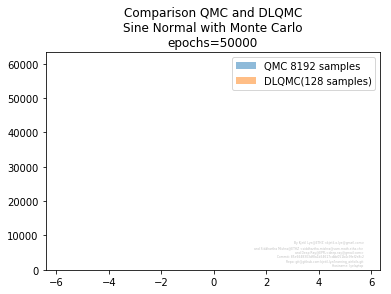

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


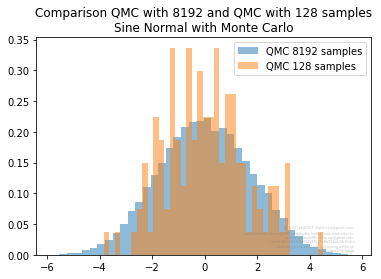

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


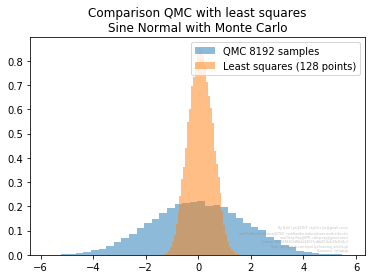

Memory usage: 1000316
Memory usage: 1000316
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


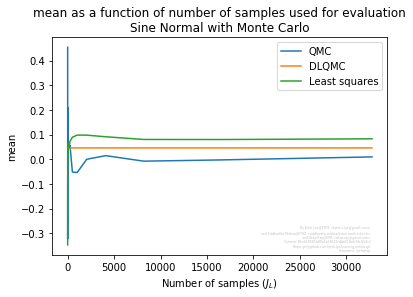

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


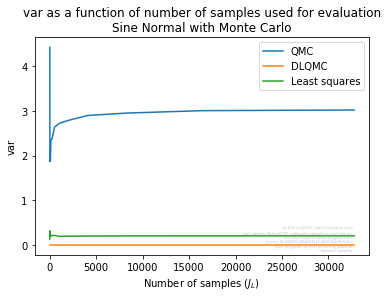

Memory usage: 1000316
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


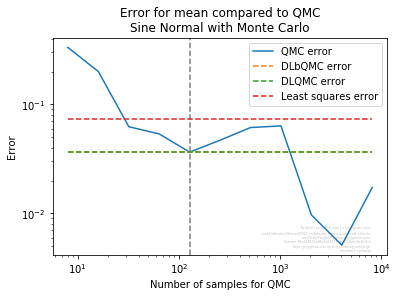

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


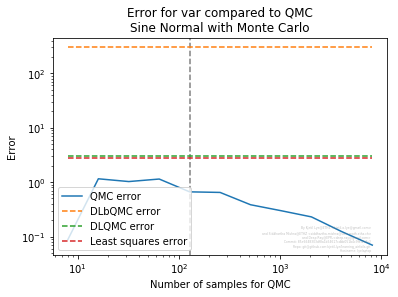

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


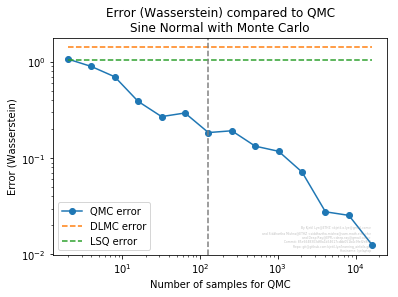



#####################################################################################
#Sine Normal with Monte Carlo_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
#####################################################################################
----------------------------  -------  -------  ------------------  ------------------  ------------------  --------------------  -------------------  ------------------
                              QMC 128  QMC 128  DLQMC               DLQMC               DLbQMC              DLbQMC                Least squares        Least squares
                              mean     var      mean                var                 mean                var                   mean                 var
Sine Normal with Monte Carlo  1.0      1.0      0.9999831082154789  0.2192639951647466  0.9989570882022667  0.002216260717658452  0.49716068073786884  0.2350318869582901
----------------------------  -------  -------  ------------------  ------------

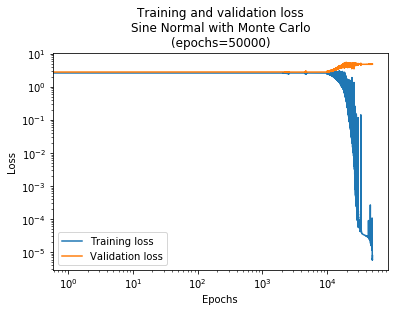

Best network index: 0
Total learning time took: 971 s


###########################################################################
#Sine Normal with Monte Carlo_SGD_mean_squared_error_ts_512_bs_512_network#
###########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##################################

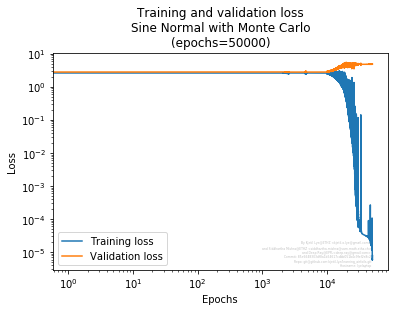

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


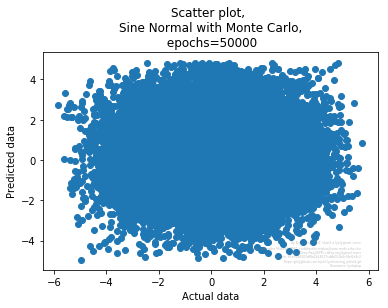

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_299 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_300 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_301 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_302 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_303 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_304 (Dense)            (None, 48)                2352      
__________

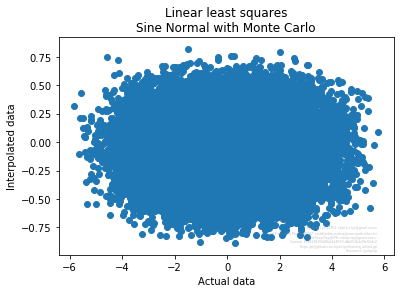

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


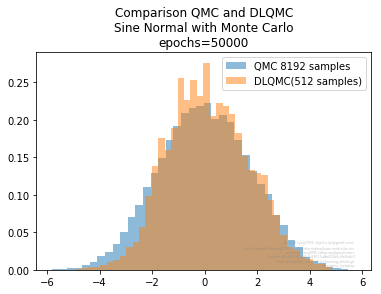

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


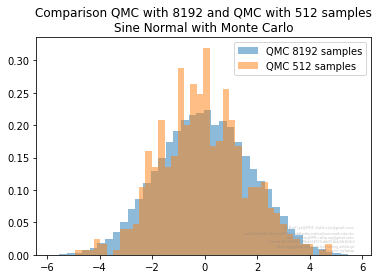

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


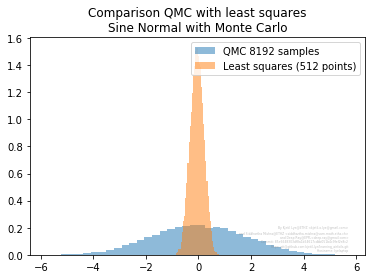

Memory usage: 1027240
Memory usage: 1027240
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


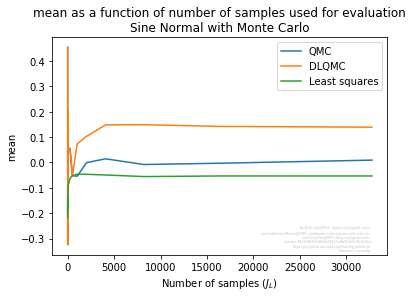

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


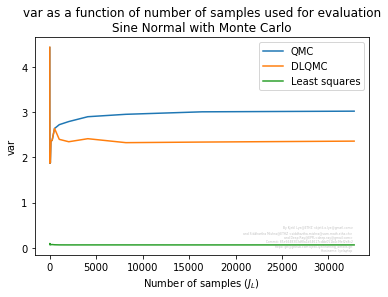

Memory usage: 1027240
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


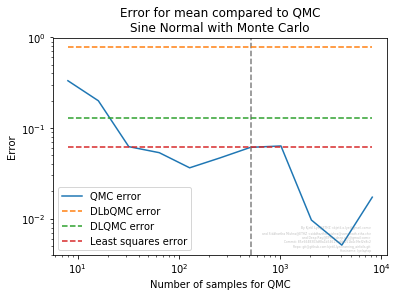

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


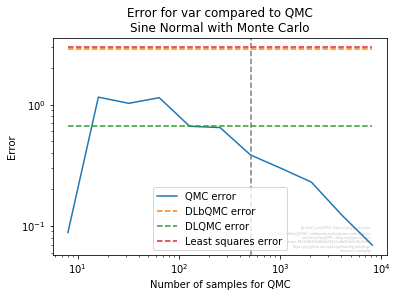

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


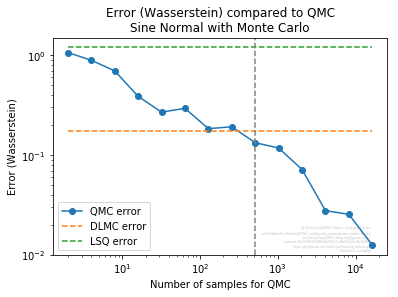



#####################################################################################
#Sine Normal with Monte Carlo_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
#####################################################################################
----------------------------  -------  -------  ------------------  ------------------  -------------------  -------------------  -----------------  -------------------
                              QMC 512  QMC 512  DLQMC               DLQMC               DLbQMC               DLbQMC               Least squares      Least squares
                              mean     var      mean                var                 mean                 var                  mean               var
Sine Normal with Monte Carlo  1.0      1.0      0.4722072747224747  0.5800210017814688  0.07912307151505774  0.13273974633681448  0.980606808631172  0.12993066448964802
----------------------------  -------  -------  ------------------  ------------------


Training took 535.2146966457367 seconds


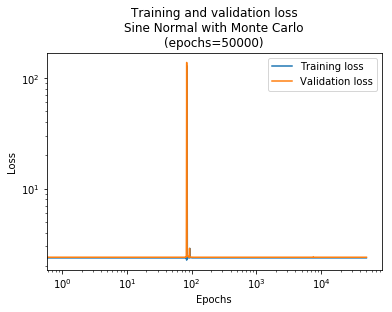

Best network index: 0
Total learning time took: 537 s


############################################################################
#Sine Normal with Monte Carlo_Adam_mean_squared_error_ts_128_bs_128_network#
############################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
###############################

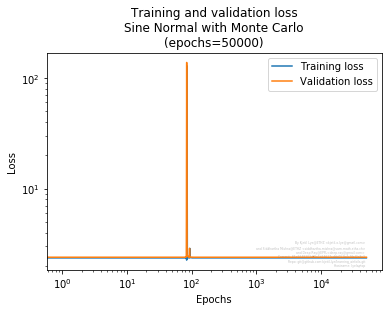

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


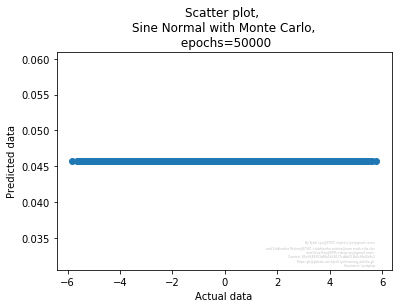

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_331 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_332 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_333 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_334 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_335 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_336 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_337 (Dense)            (None, 48)                2352      
__________

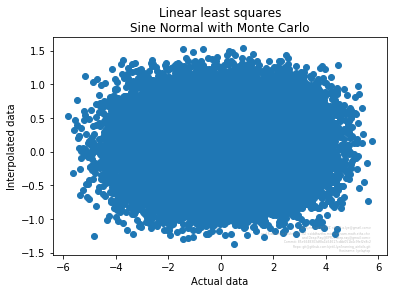

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


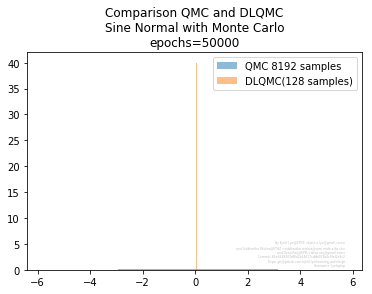

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


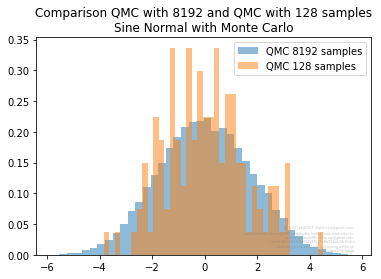

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


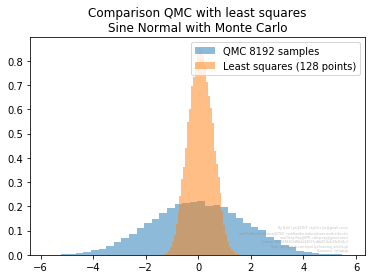

Memory usage: 1114532
Memory usage: 1114532
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


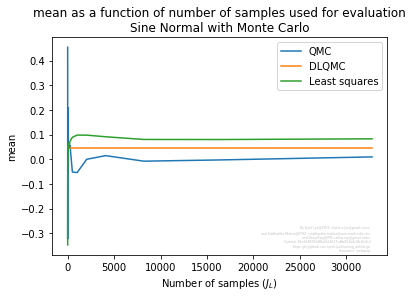

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


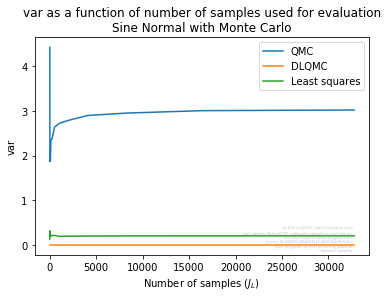

Memory usage: 1114532
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


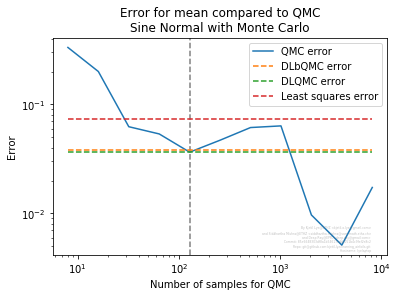

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


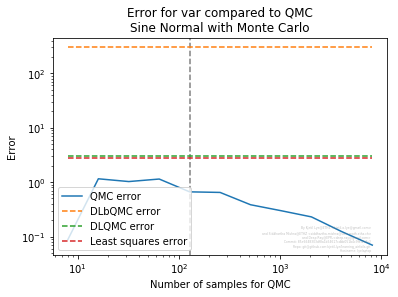

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


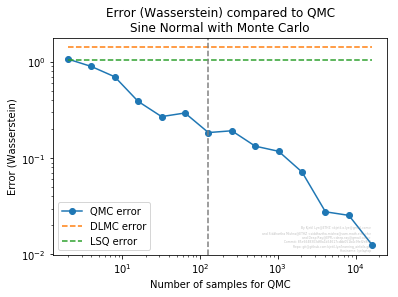



######################################################################################
#Sine Normal with Monte Carlo_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
######################################################################################
----------------------------  -------  -------  ------------------  ------------------  ------------------  ---------------------  -------------------  ------------------
                              QMC 128  QMC 128  DLQMC               DLQMC               DLbQMC              DLbQMC                 Least squares        Least squares
                              mean     var      mean                var                 mean                var                    mean                 var
Sine Normal with Monte Carlo  1.0      1.0      0.9996337833314778  0.2192639951377856  0.9548972578528472  0.0022162630045241072  0.49716068073786884  0.2350318869582901
----------------------------  -------  -------  ------------------  -----

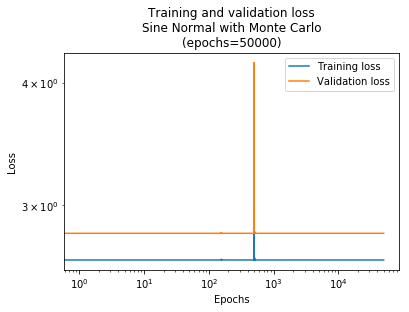

Best network index: 0
Total learning time took: 1073 s


############################################################################
#Sine Normal with Monte Carlo_Adam_mean_squared_error_ts_512_bs_512_network#
############################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##############################

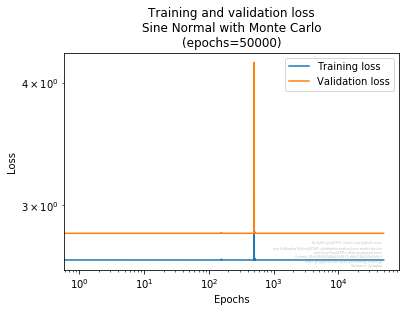

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


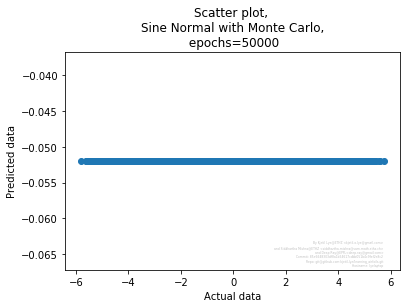

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_365 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_366 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_367 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_368 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_369 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_370 (Dense)            (None, 48)                2352      
__________

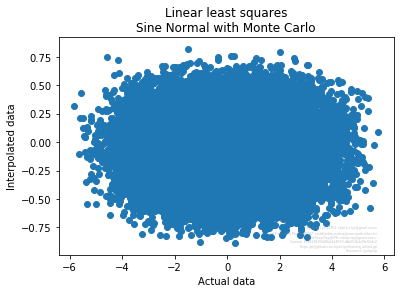

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


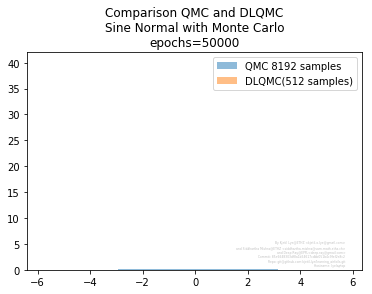

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


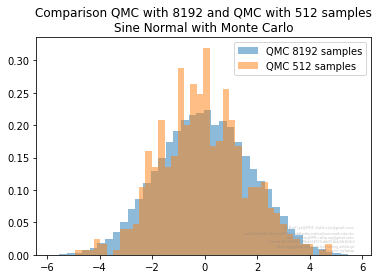

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


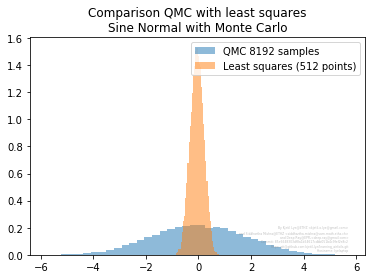

Memory usage: 1172744
Memory usage: 1172744
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


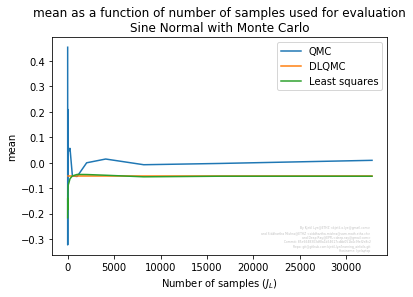

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


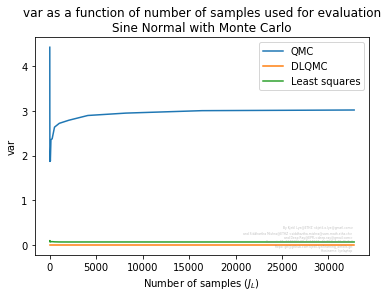

Memory usage: 1172744
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


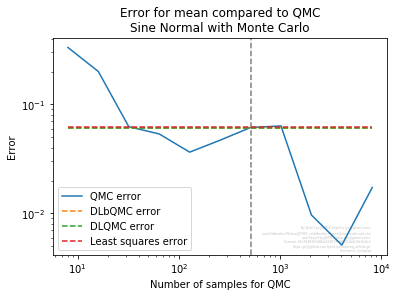

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


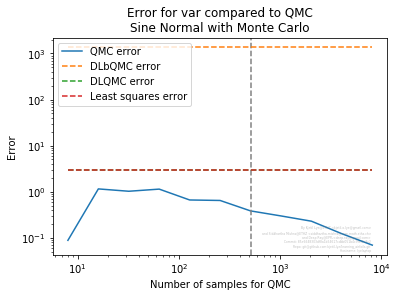

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


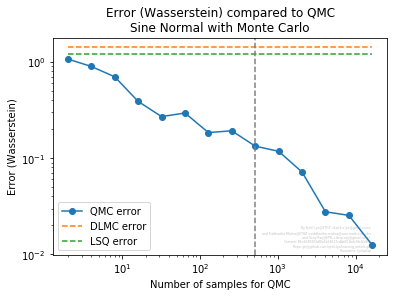



######################################################################################
#Sine Normal with Monte Carlo_Adam_mean_squared_error_all_ts_512_bs_512_speedup_table#
######################################################################################
----------------------------  -------  -------  ------------------  -------------------  ------------------  ----------------------  -----------------  -------------------
                              QMC 512  QMC 512  DLQMC               DLQMC                DLbQMC              DLbQMC                  Least squares      Least squares
                              mean     var      mean                var                  mean                var                     mean               var
Sine Normal with Monte Carlo  1.0      1.0      0.9999990789411409  0.12710316934865015  0.9995899326119569  0.00028503378238823473  0.980606808631172  0.12993066448964802
----------------------------  -------  -------  ------------------  ---


Training took 551.2803468704224 seconds


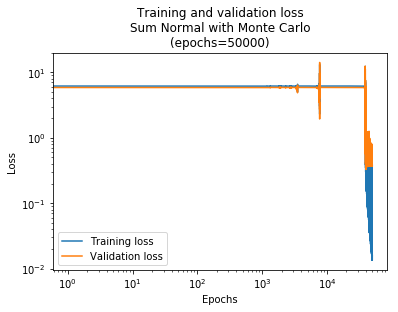

Best network index: 0
Total learning time took: 553 s


##########################################################################
#Sum Normal with Monte Carlo_SGD_mean_squared_error_ts_128_bs_128_network#
##########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#####################################

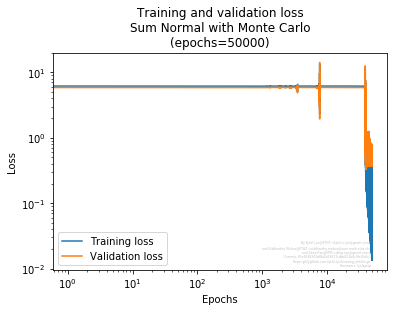

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


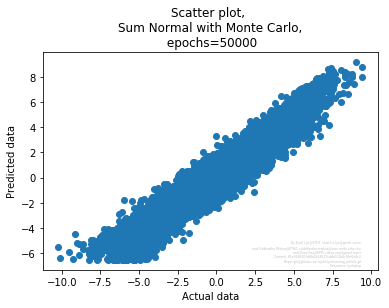

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_398 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_399 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_400 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_401 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_402 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_403 (Dense)            (None, 48)                2352      
__________

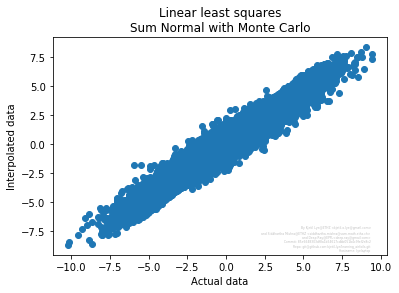

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


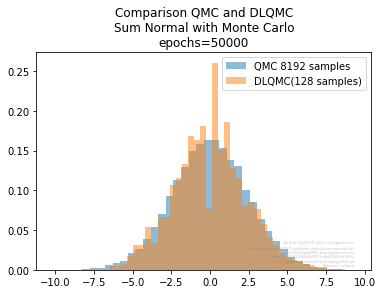

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


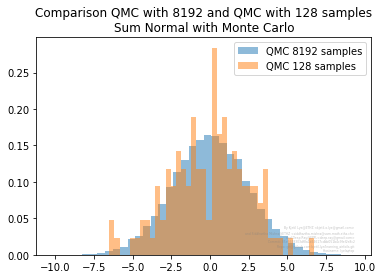

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


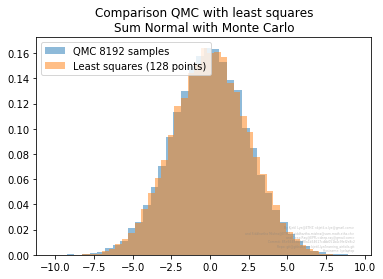

Memory usage: 1210052
Memory usage: 1210052
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


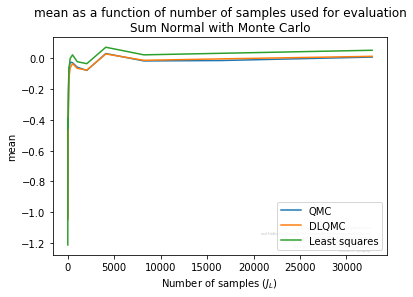

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


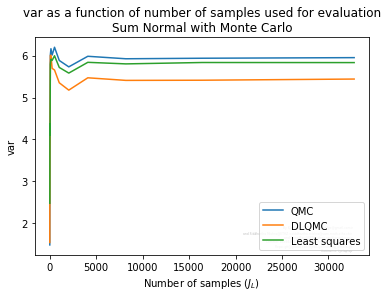

Memory usage: 1210052
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


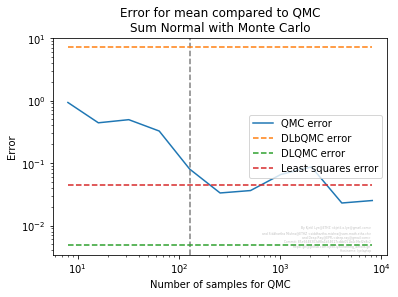

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


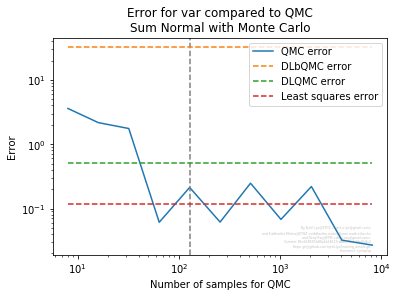

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


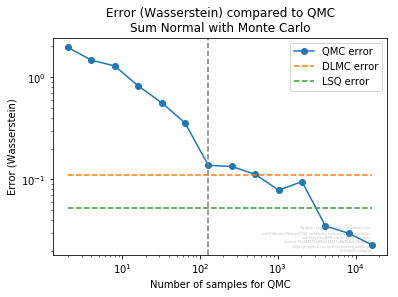



####################################################################################
#Sum Normal with Monte Carlo_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
####################################################################################
---------------------------  -------  -------  ------------------  -----------------  --------------------  --------------------  ------------------  ------------------
                             QMC 128  QMC 128  DLQMC               DLQMC              DLbQMC                DLbQMC                Least squares       Least squares
                             mean     var      mean                var                mean                  var                   mean                var
Sum Normal with Monte Carlo  1.0      1.0      16.485820631129894  0.416527484000358  0.011291306878753212  0.006643009467088717  1.8105608447895265  1.7996208315717361
---------------------------  -------  -------  ------------------  -----------------  -

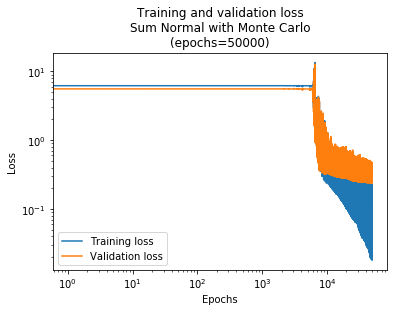

Best network index: 0
Total learning time took: 1069 s


##########################################################################
#Sum Normal with Monte Carlo_SGD_mean_squared_error_ts_512_bs_512_network#
##########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
####################################

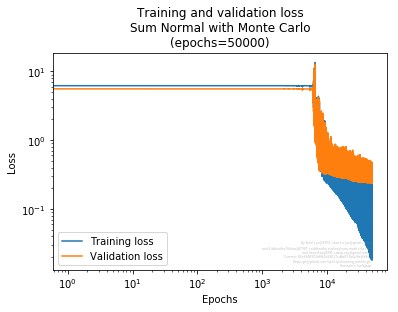

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


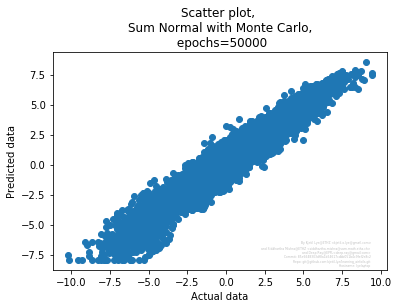

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_430 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_431 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_432 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_433 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_434 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_435 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_436 (Dense)            (None, 48)                2352      
__________

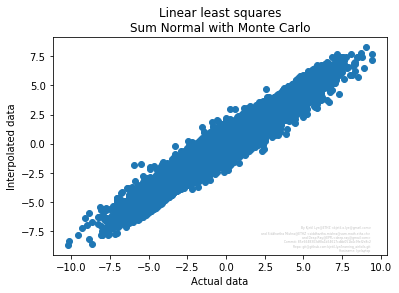

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


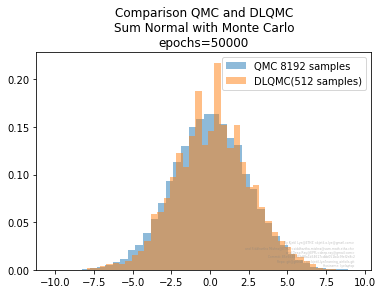

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


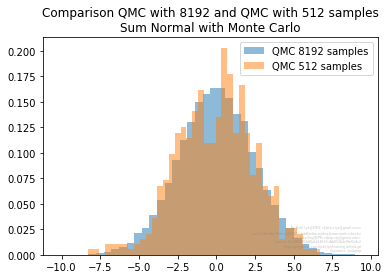

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


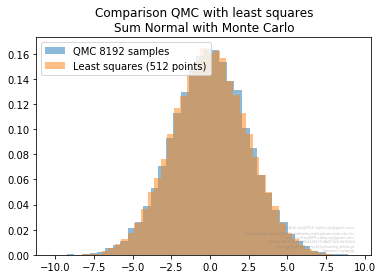

Memory usage: 1241276
Memory usage: 1241276
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


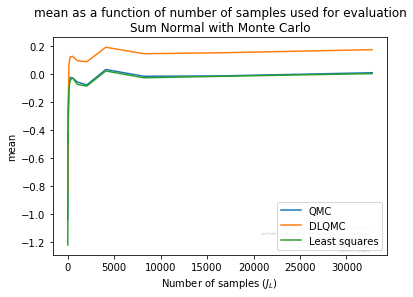

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


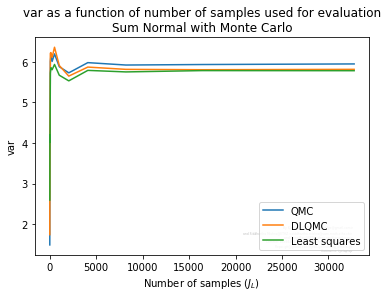

Memory usage: 1241276
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


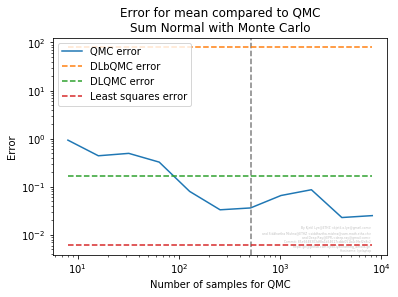

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


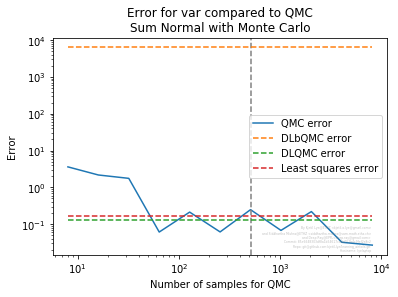

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


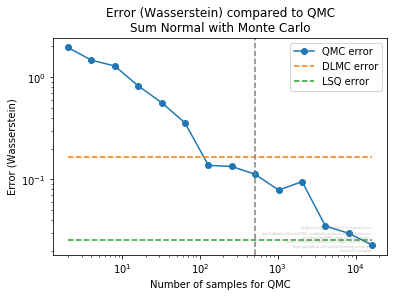



####################################################################################
#Sum Normal with Monte Carlo_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
####################################################################################
---------------------------  -------  -------  ------------------  ------------------  ----------------------  ---------------------  -----------------  ------------------
                             QMC 512  QMC 512  DLQMC               DLQMC               DLbQMC                  DLbQMC                 Least squares      Least squares
                             mean     var      mean                var                 mean                    var                    mean               var
Sum Normal with Monte Carlo  1.0      1.0      0.2210167938971628  1.8572792653519956  0.00046049993966198007  3.923010336357321e-05  5.926447388234649  1.4855588551528622
---------------------------  -------  -------  ------------------  --------


Training took 617.3059961795807 seconds


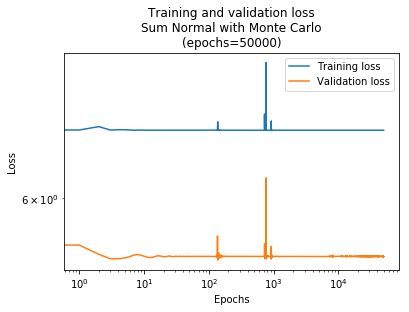

Best network index: 0
Total learning time took: 620 s


###########################################################################
#Sum Normal with Monte Carlo_Adam_mean_squared_error_ts_128_bs_128_network#
###########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##################################

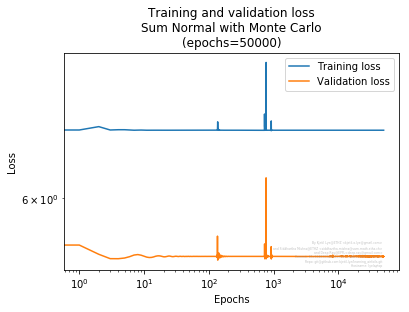

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


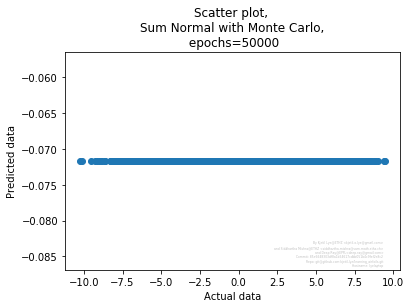

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_463 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_464 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_465 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_466 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_467 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_468 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_469 (Dense)            (None, 48)                2352      
__________

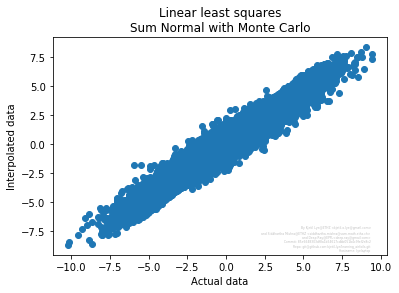

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


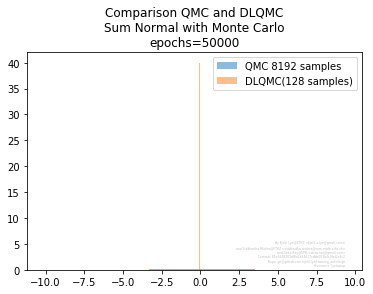

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


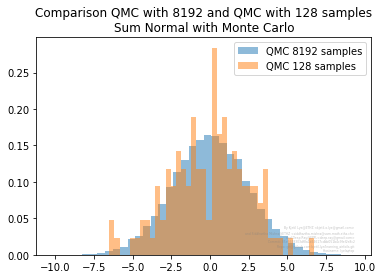

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


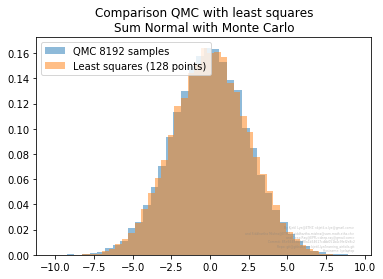

Memory usage: 1339972
Memory usage: 1339972
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


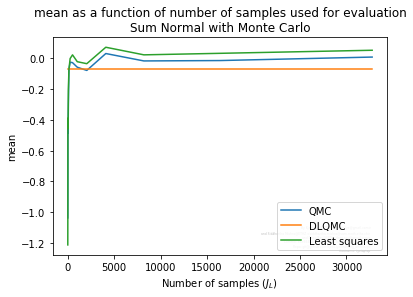

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


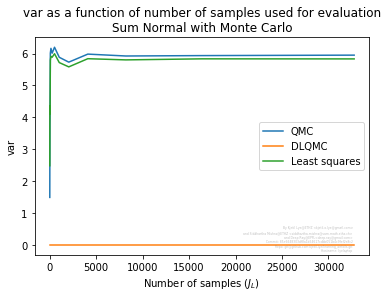

Memory usage: 1339972
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


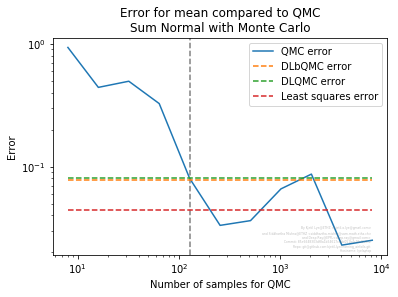

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


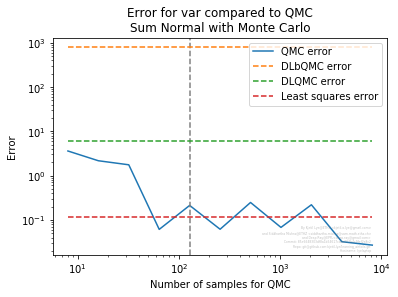

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


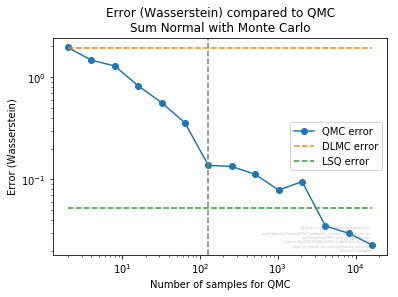



#####################################################################################
#Sum Normal with Monte Carlo_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
#####################################################################################
---------------------------  -------  -------  -----------------  -------------------  ------------------  ----------------------  ------------------  ------------------
                             QMC 128  QMC 128  DLQMC              DLQMC                DLbQMC              DLbQMC                  Least squares       Least squares
                             mean     var      mean               var                  mean                var                     mean                var
Sum Normal with Monte Carlo  1.0      1.0      1.000295927135577  0.03571109877896189  1.0396775327935988  0.00027142040348538716  1.8105608447895265  1.7996208315717361
---------------------------  -------  -------  -----------------  --------------

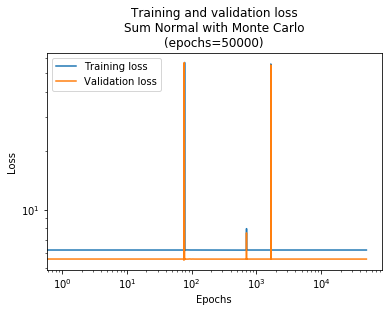

Best network index: 0
Total learning time took: 1144 s


###########################################################################
#Sum Normal with Monte Carlo_Adam_mean_squared_error_ts_512_bs_512_network#
###########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#################################

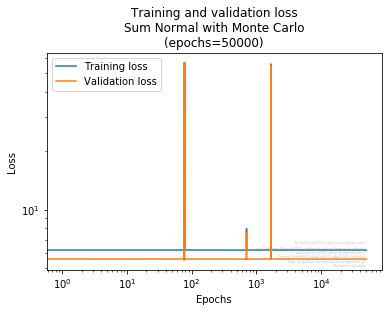

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


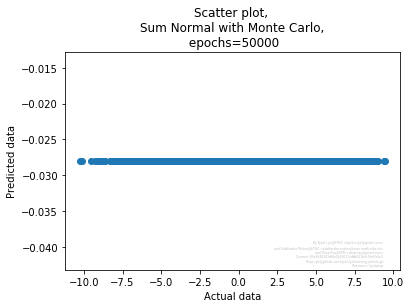

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_496 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_497 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_498 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_499 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_500 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_501 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_502 (Dense)            (None, 48)                2352      
__________

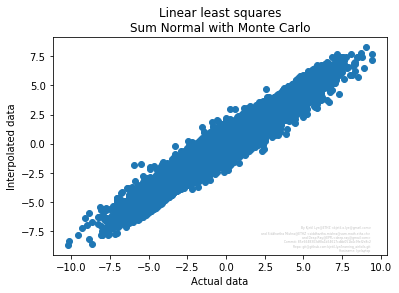

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


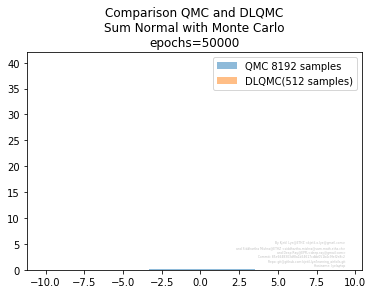

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


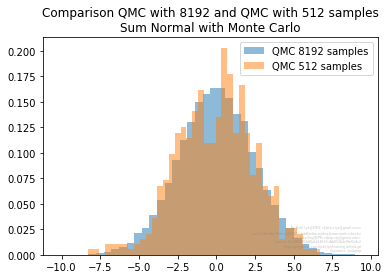

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


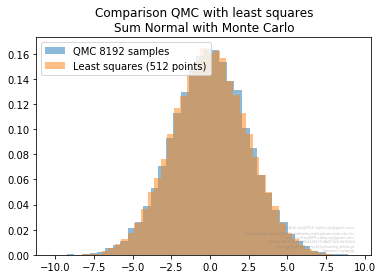

Memory usage: 1369096
Memory usage: 1369096
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


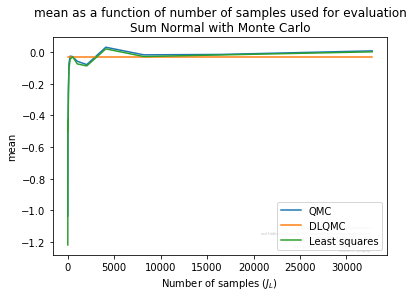

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


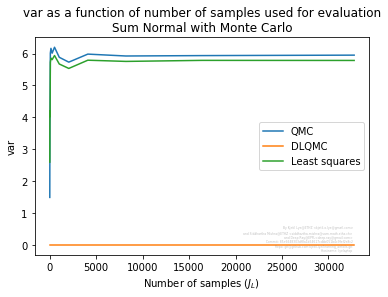

Memory usage: 1369096
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


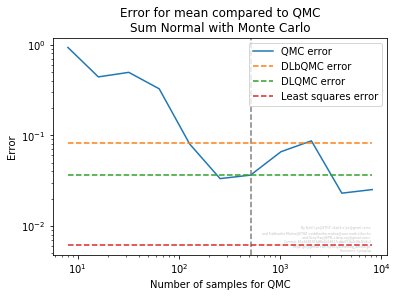

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


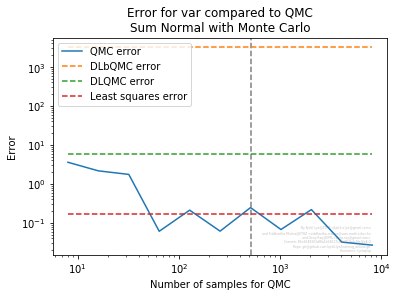

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


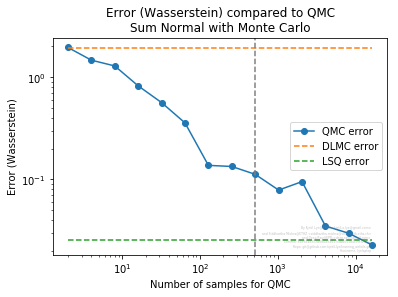



#####################################################################################
#Sum Normal with Monte Carlo_Adam_mean_squared_error_all_ts_512_bs_512_speedup_table#
#####################################################################################
---------------------------  -------  -------  ------------------  -------------------  ------------------  ---------------------  -----------------  ------------------
                             QMC 512  QMC 512  DLQMC               DLQMC                DLbQMC              DLbQMC                 Least squares      Least squares
                             mean     var      mean                var                  mean                var                    mean               var
Sum Normal with Monte Carlo  1.0      1.0      0.9975334538722618  0.04159331837577614  0.4408467789226001  7.813966477840589e-05  5.926447388234649  1.4855588551528622
---------------------------  -------  -------  ------------------  -----------------


Training took 614.8354697227478 seconds


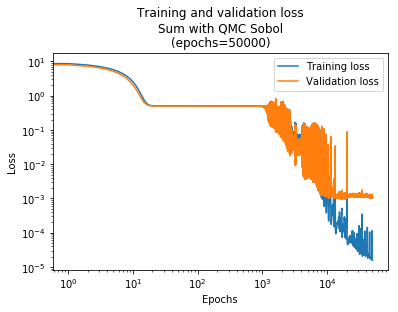

Best network index: 0
Total learning time took: 618 s


#################################################################
#Sum with QMC Sobol_SGD_mean_squared_error_ts_128_bs_128_network#
#################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
################################################################

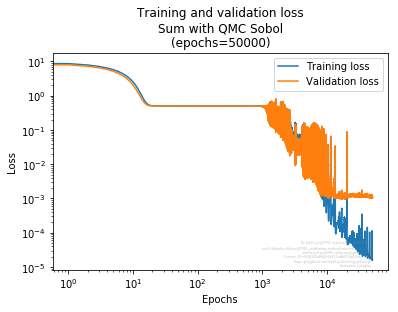

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


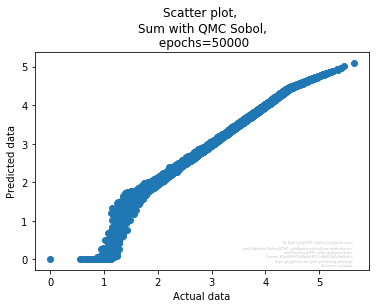

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_529 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_530 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_531 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_532 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_533 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_534 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_535 (Dense)            (None, 48)                2352      
__________

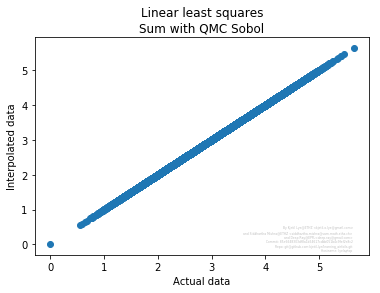

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


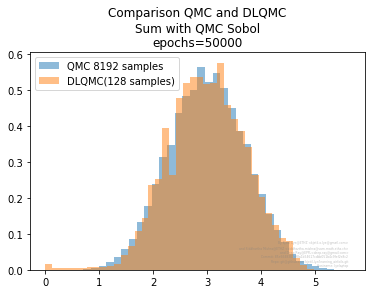

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


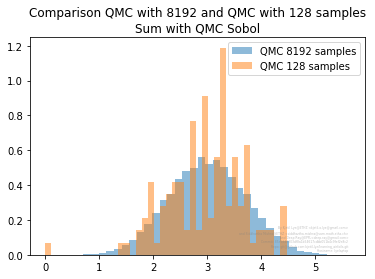

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


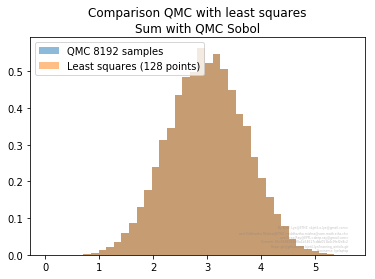

Memory usage: 1418768
Memory usage: 1418768
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


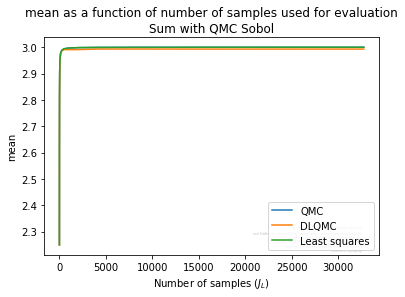

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


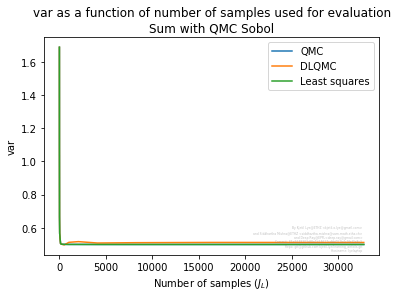

Memory usage: 1418768


../python/machine_learning.py:464: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


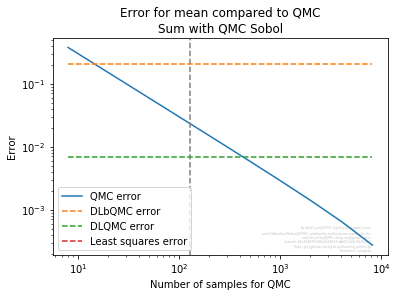

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


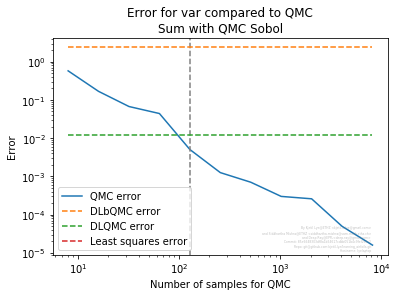

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


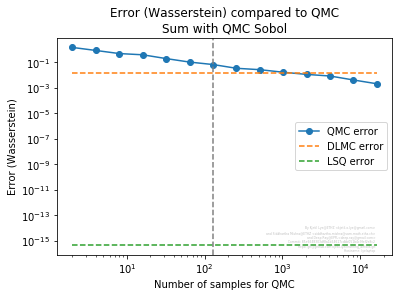



###########################################################################
#Sum with QMC Sobol_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
###########################################################################
------------------  -------  -------  ------------------  ------------------  -------------------  ---------------------  -------------  -------------
                    QMC 128  QMC 128  DLQMC               DLQMC               DLbQMC               DLbQMC                 Least squares  Least squares
                    mean     var      mean                var                 mean                 var                    mean           var
Sum with QMC Sobol  1.0      1.0      3.3464338197600902  0.4184746669150272  0.11495416713258205  0.0021366755720019183  inf            inf
------------------  -------  -------  ------------------  ------------------  -------------------  ---------------------  -------------  -------------
###################################

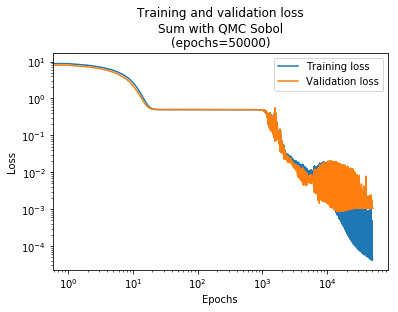

Best network index: 0
Total learning time took: 1113 s


#################################################################
#Sum with QMC Sobol_SGD_mean_squared_error_ts_512_bs_512_network#
#################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
###############################################################

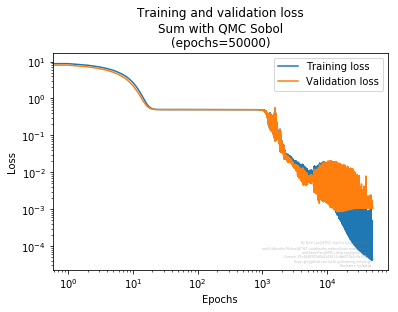

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


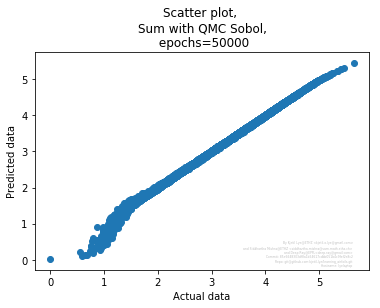

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_562 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_563 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_564 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_565 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_566 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_567 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_568 (Dense)            (None, 48)                2352      
__________

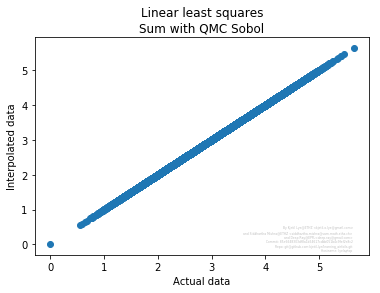

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


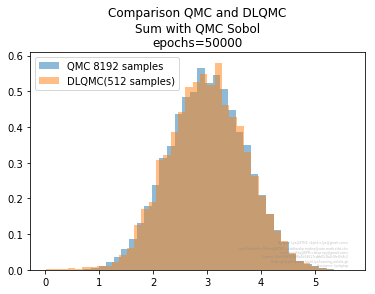

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


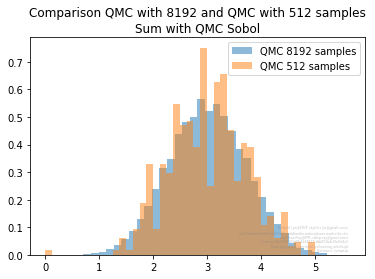

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


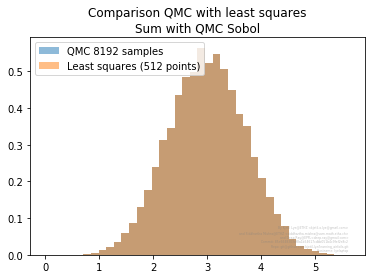

Memory usage: 1485336
Memory usage: 1485336
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


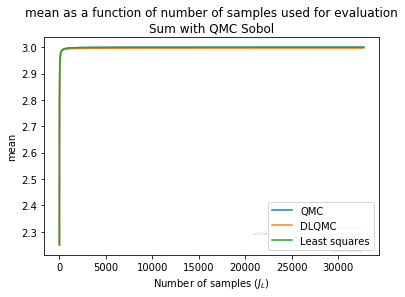

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


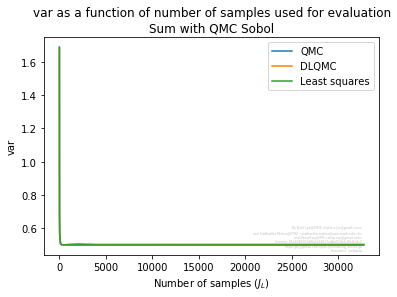

Memory usage: 1485336


../python/machine_learning.py:464: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


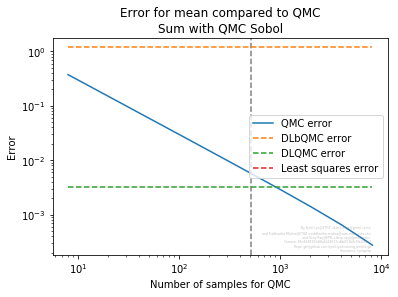

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


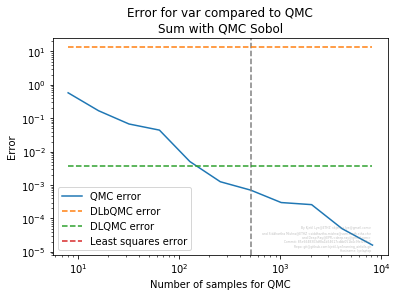

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


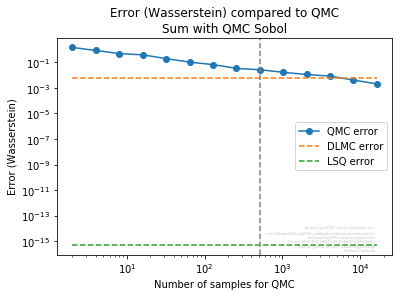



###########################################################################
#Sum with QMC Sobol_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
###########################################################################
------------------  -------  -------  ------------------  ------------------  --------------------  ---------------------  -------------  -------------
                    QMC 512  QMC 512  DLQMC               DLQMC               DLbQMC                DLbQMC                 Least squares  Least squares
                    mean     var      mean                var                 mean                  var                    mean           var
Sum with QMC Sobol  1.0      1.0      1.8086124401913874  0.1848959253544857  0.004862682778993459  5.352922169804562e-05  inf            inf
------------------  -------  -------  ------------------  ------------------  --------------------  ---------------------  -------------  -------------
##############################


Training took 663.8367486000061 seconds


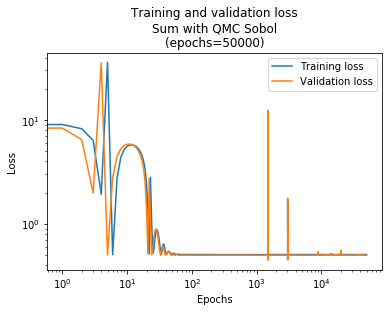

Best network index: 0
Total learning time took: 667 s


##################################################################
#Sum with QMC Sobol_Adam_mean_squared_error_ts_128_bs_128_network#
##################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#############################################################

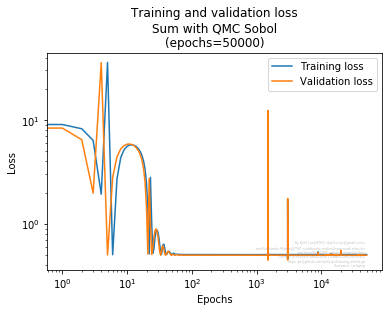

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


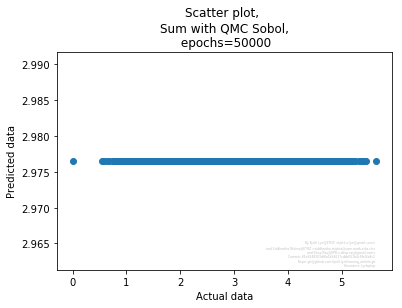

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_595 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_596 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_597 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_598 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_599 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_600 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_601 (Dense)            (None, 48)                2352      
__________

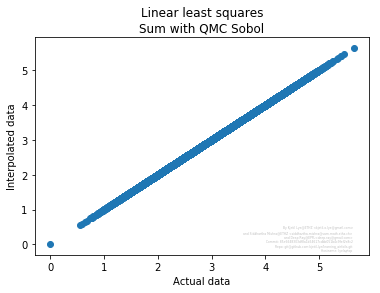

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


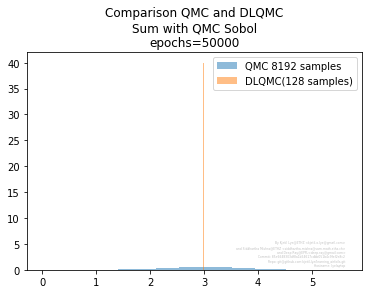

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


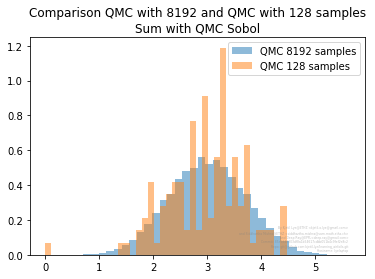

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


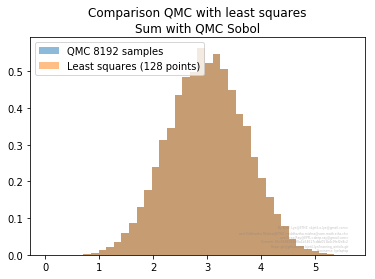

Memory usage: 1521616
Memory usage: 1521616
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


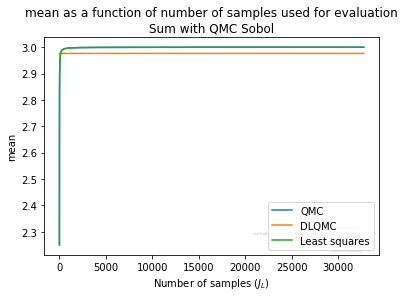

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


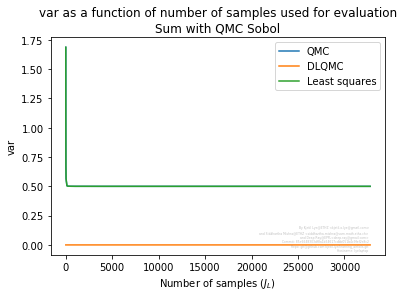

Memory usage: 1521616


../python/machine_learning.py:464: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


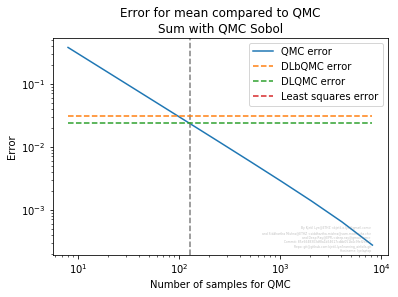

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


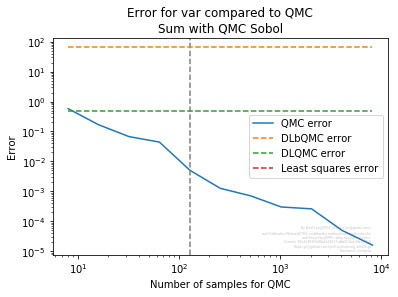

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


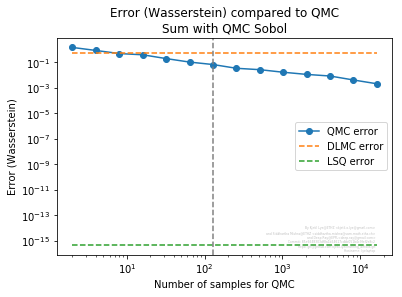



############################################################################
#Sum with QMC Sobol_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
############################################################################
------------------  -------  -------  ------------------  --------------------  ------------------  --------------------  -------------  -------------
                    QMC 128  QMC 128  DLQMC               DLQMC                 DLbQMC              DLbQMC                Least squares  Least squares
                    mean     var      mean                var                   mean                var                   mean           var
Sum with QMC Sobol  1.0      1.0      0.9974533971681776  0.010115810270340619  0.7537293902119864  7.87371773863569e-05  inf            inf
------------------  -------  -------  ------------------  --------------------  ------------------  --------------------  -------------  -------------
################################

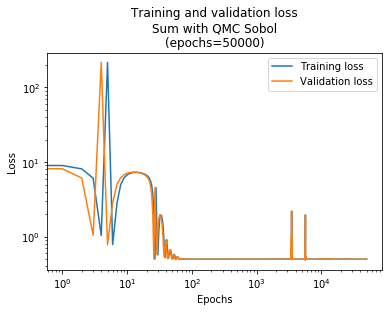

Best network index: 0
Total learning time took: 1194 s


##################################################################
#Sum with QMC Sobol_Adam_mean_squared_error_ts_512_bs_512_network#
##################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
############################################################

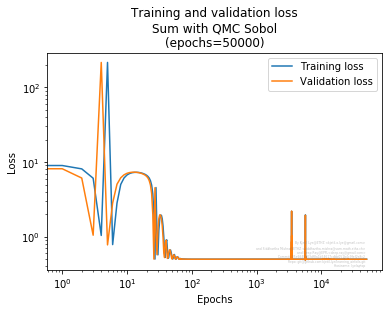

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


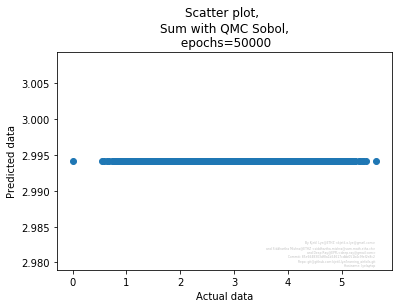

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_628 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_629 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_630 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_631 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_632 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_633 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_634 (Dense)            (None, 48)                2352      
__________

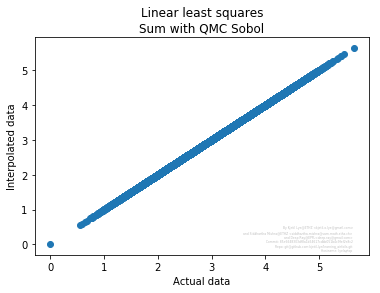

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


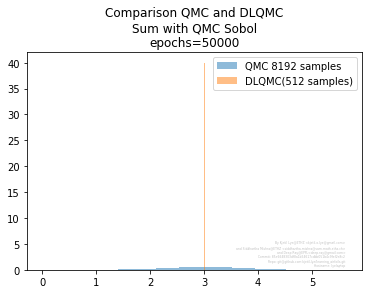

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


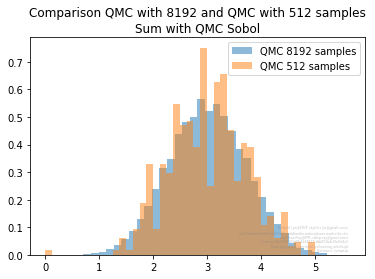

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


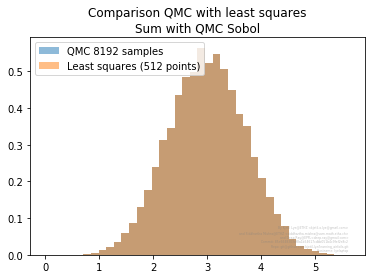

Memory usage: 1579700
Memory usage: 1579700
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


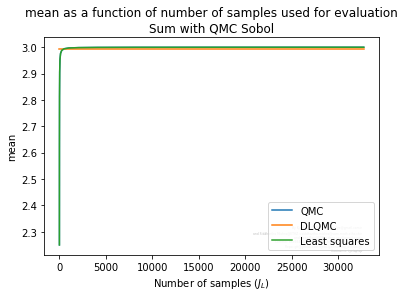

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


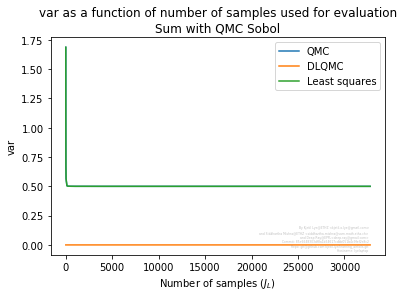

Memory usage: 1579700


../python/machine_learning.py:464: RuntimeWarning: divide by zero encountered in double_scalars
  speedup = error_base/error


Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


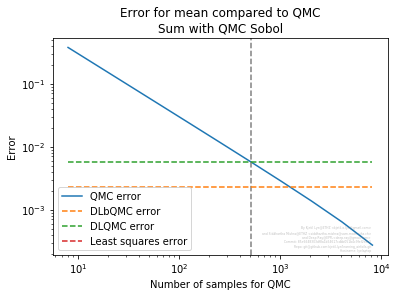

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


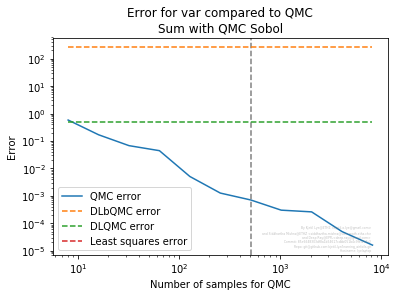

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


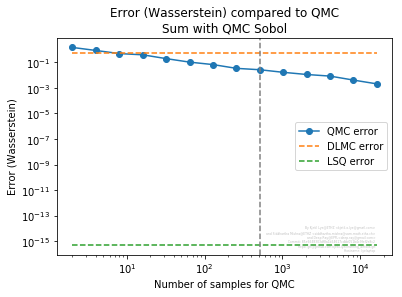



############################################################################
#Sum with QMC Sobol_Adam_mean_squared_error_all_ts_512_bs_512_speedup_table#
############################################################################
------------------  -------  -------  ------------------  --------------------  ------------------  ---------------------  -------------  -------------
                    QMC 512  QMC 512  DLQMC               DLQMC                 DLbQMC              DLbQMC                 Least squares  Least squares
                    mean     var      mean                var                   mean                var                    mean           var
Sum with QMC Sobol  1.0      1.0      1.0026940771749493  0.001410755107380229  2.5030522503879977  2.757909195188409e-06  inf            inf
------------------  -------  -------  ------------------  --------------------  ------------------  ---------------------  -------------  -------------
###########################


Training took 682.3697466850281 seconds


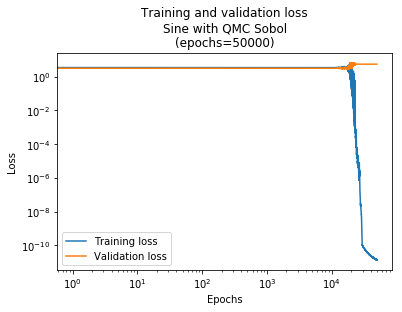

Best network index: 0
Total learning time took: 686 s


##################################################################
#Sine with QMC Sobol_SGD_mean_squared_error_ts_128_bs_128_network#
##################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#############################################################

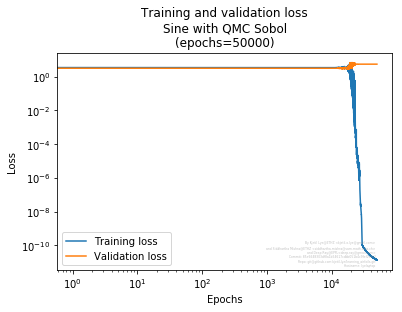

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


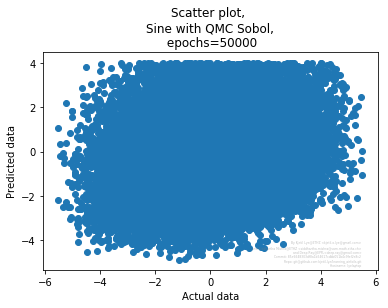

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_661 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_662 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_663 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_664 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_665 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_666 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_667 (Dense)            (None, 48)                2352      
__________

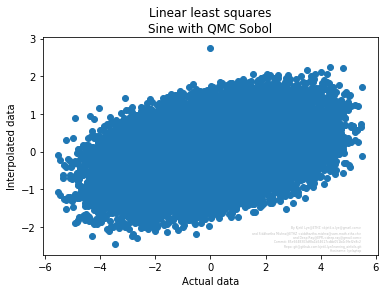

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


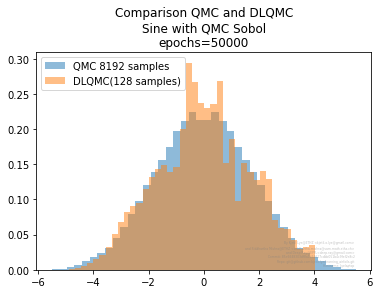

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


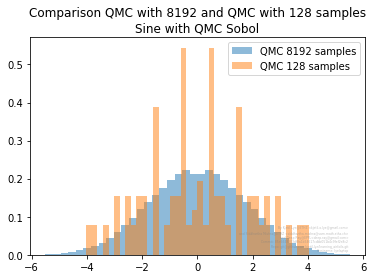

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


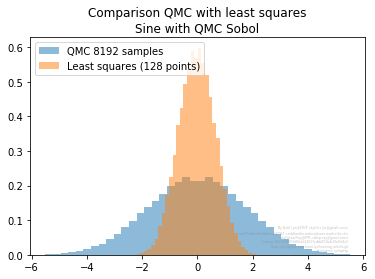

Memory usage: 1633648
Memory usage: 1633648
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


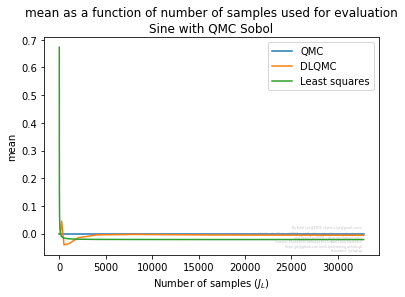

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


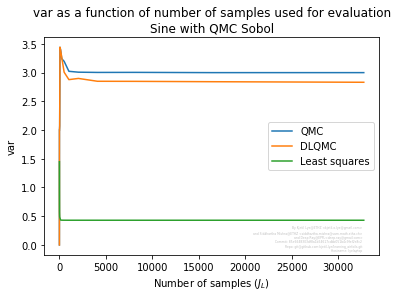

Memory usage: 1633648
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


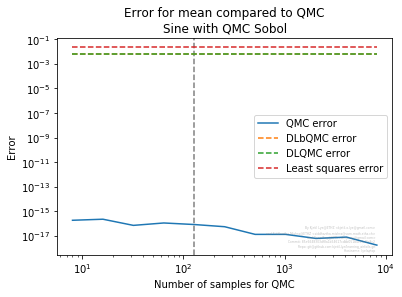

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


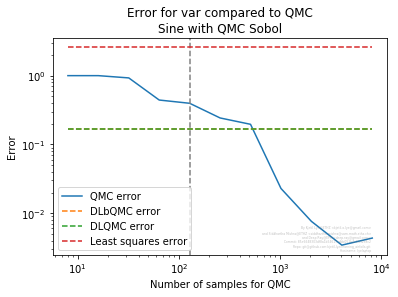

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


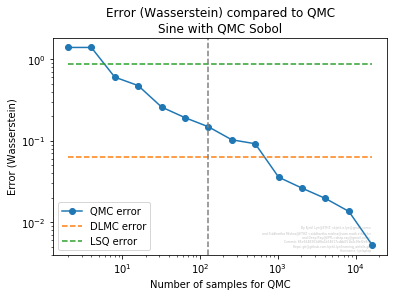



############################################################################
#Sine with QMC Sobol_SGD_mean_squared_error_all_ts_128_bs_128_speedup_table#
############################################################################
-------------------  -------  -------  ----------------------  -----------------  ----------------------  ------------------  ----------------------  ------------------
                     QMC 128  QMC 128  DLQMC                   DLQMC              DLbQMC                  DLbQMC              Least squares           Least squares
                     mean     var      mean                    var                mean                    var                 mean                    var
Sine with QMC Sobol  1.0      1.0      1.3333125056563902e-14  2.359810828967468  1.3334764829582955e-14  2.3596868335586683  3.8098079066126264e-15  0.1542435681974373
-------------------  -------  -------  ----------------------  -----------------  ----------------------  -----

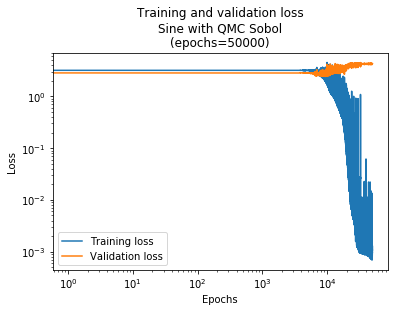

Best network index: 0
Total learning time took: 1177 s


##################################################################
#Sine with QMC Sobol_SGD_mean_squared_error_ts_512_bs_512_network#
##################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
############################################################

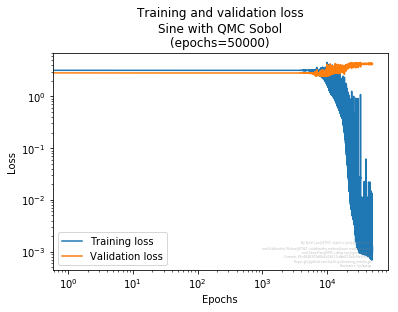

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


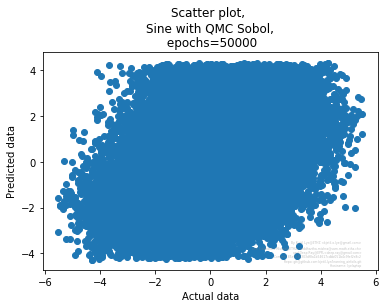

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_694 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_695 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_696 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_697 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_698 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_699 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_700 (Dense)            (None, 48)                2352      
__________

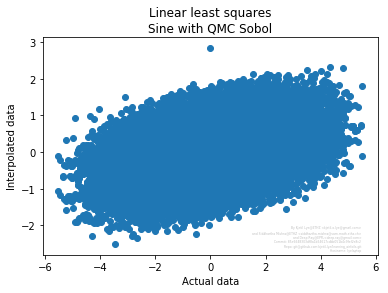

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


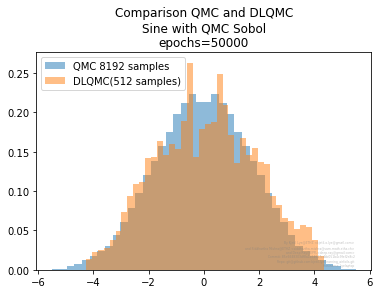

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


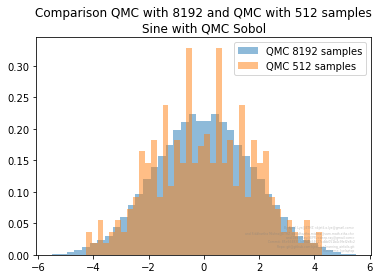

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


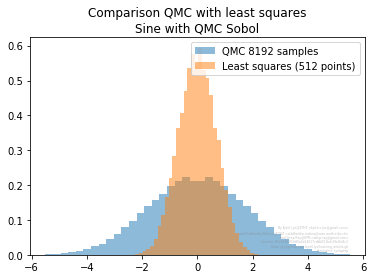

Memory usage: 1665888
Memory usage: 1665888
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


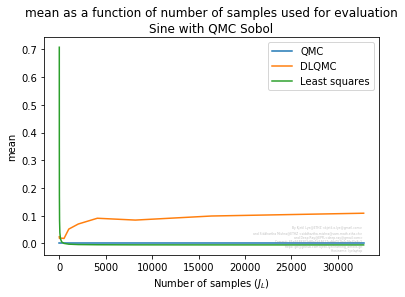

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


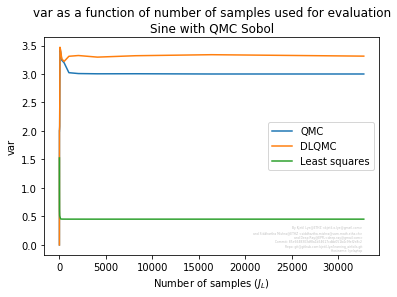

Memory usage: 1665888
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


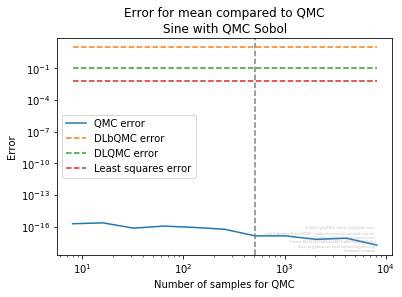

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


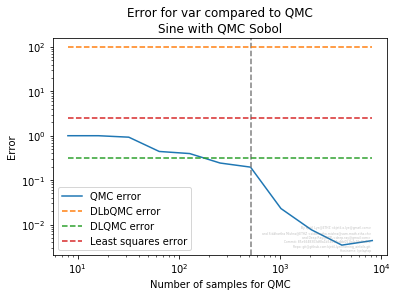

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


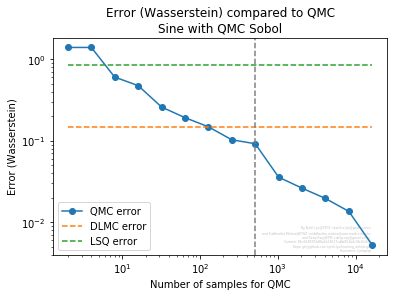



############################################################################
#Sine with QMC Sobol_SGD_mean_squared_error_all_ts_512_bs_512_speedup_table#
############################################################################
-------------------  -------  -------  ----------------------  ------------------  ----------------------  --------------------  ----------------------  -------------------
                     QMC 512  QMC 512  DLQMC                   DLQMC               DLbQMC                  DLbQMC                Least squares           Least squares
                     mean     var      mean                    var                 mean                    var                   mean                    var
Sine with QMC Sobol  1.0      1.0      1.1950037538463122e-16  0.6257256743483306  1.4136412743036316e-18  0.002016092092317619  2.3718018751959744e-15  0.07697792965564691
-------------------  -------  -------  ----------------------  ------------------  --------------


Training took 750.8040957450867 seconds


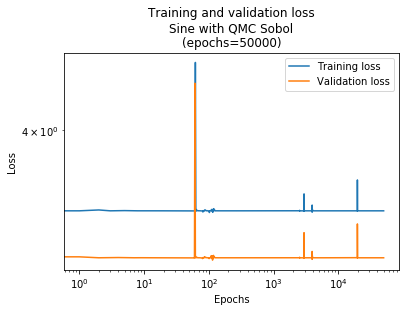

Best network index: 0
Total learning time took: 754 s


###################################################################
#Sine with QMC Sobol_Adam_mean_squared_error_ts_128_bs_128_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
##########################################################

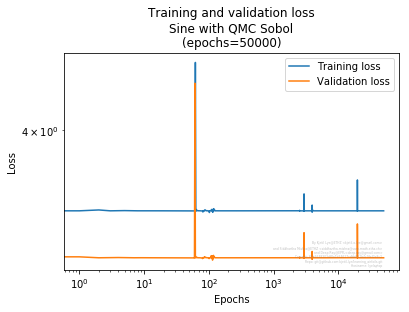

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


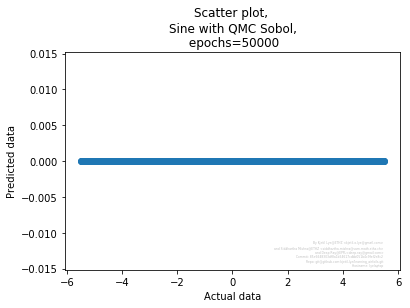

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_727 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_728 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_729 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_730 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_731 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_732 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_733 (Dense)            (None, 48)                2352      
__________

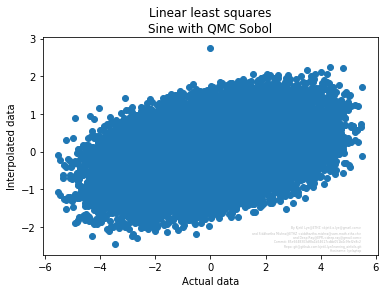

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


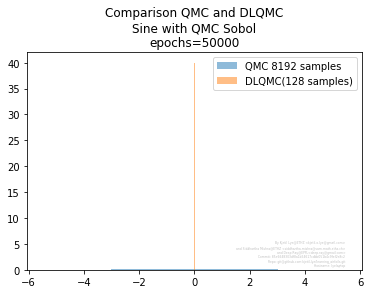

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


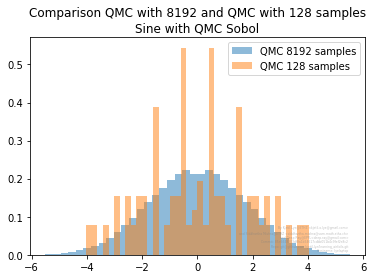

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


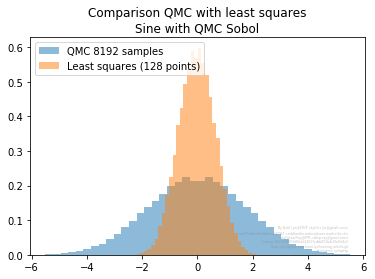

Memory usage: 1749284
Memory usage: 1749284
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


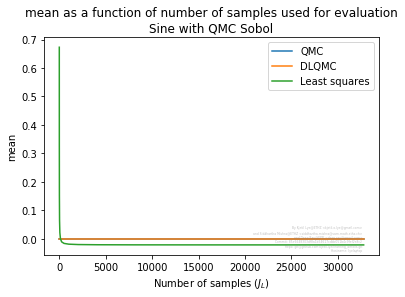

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


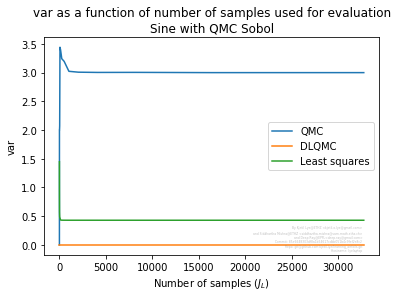

Memory usage: 1749284
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


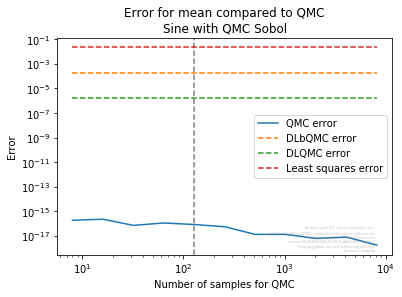

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


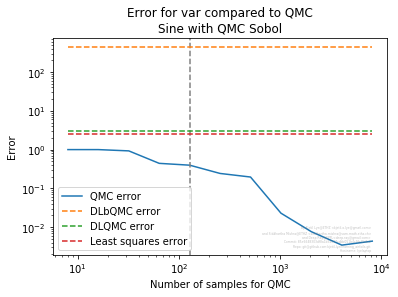

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


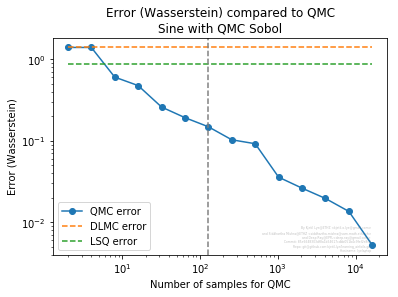



#############################################################################
#Sine with QMC Sobol_Adam_mean_squared_error_all_ts_128_bs_128_speedup_table#
#############################################################################
-------------------  -------  -------  ----------------------  -------------------  ---------------------  ---------------------  ----------------------  ------------------
                     QMC 128  QMC 128  DLQMC                   DLQMC                DLbQMC                 DLbQMC                 Least squares           Least squares
                     mean     var      mean                    var                  mean                   var                    mean                    var
Sine with QMC Sobol  1.0      1.0      5.4480076717069704e-11  0.13215424182325444  4.223261761241455e-13  0.0009182750901533301  3.8098079066126264e-15  0.1542435681974373
-------------------  -------  -------  ----------------------  -------------------  --------

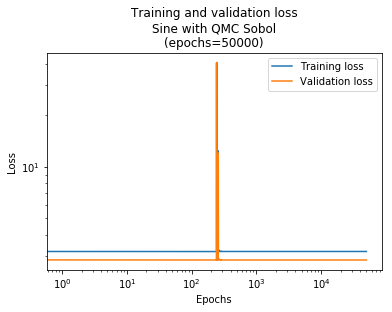

Best network index: 0
Total learning time took: 1287 s


###################################################################
#Sine with QMC Sobol_Adam_mean_squared_error_ts_512_bs_512_network#
###################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
#########################################################

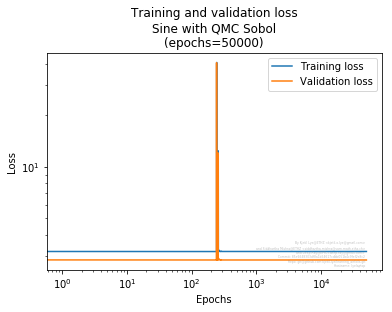

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


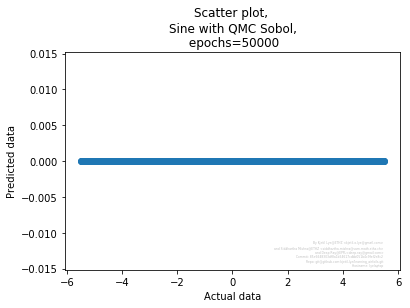

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_760 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_761 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_762 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_763 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_764 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_765 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_766 (Dense)            (None, 48)                2352      
__________

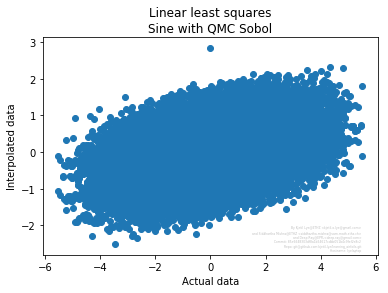

(32768,)
(32768, 6)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


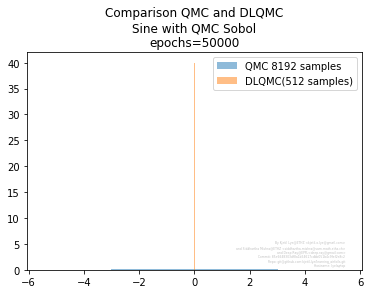

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


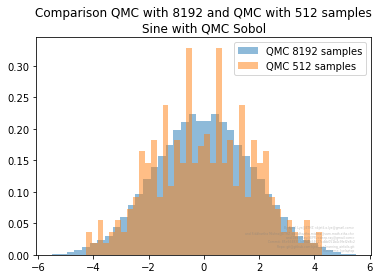

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


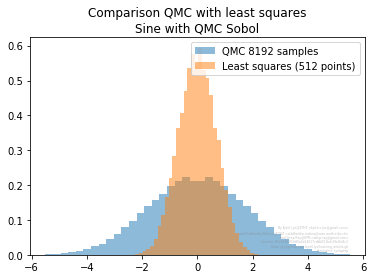

Memory usage: 1790288
Memory usage: 1790288
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


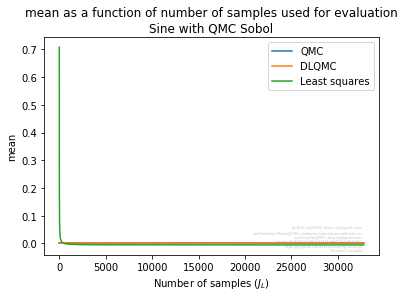

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


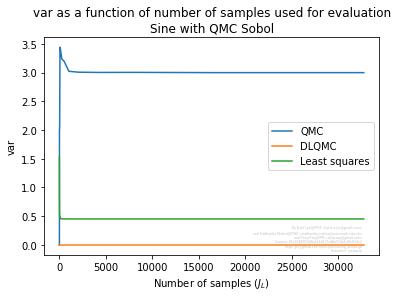

Memory usage: 1790288
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


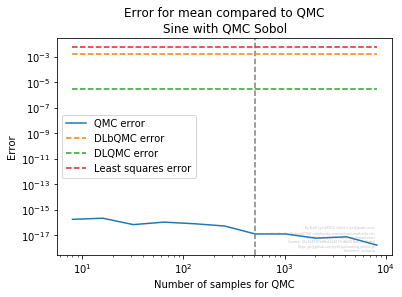

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


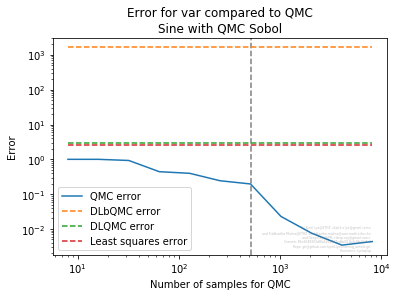

Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


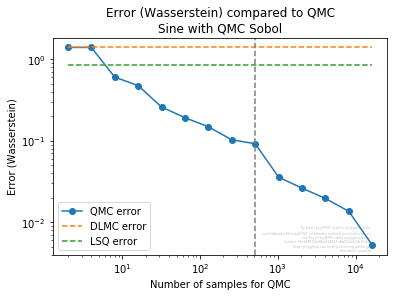



#############################################################################
#Sine with QMC Sobol_Adam_mean_squared_error_all_ts_512_bs_512_speedup_table#
#############################################################################
-------------------  -------  -------  ----------------------  -------------------  ---------------------  ----------------------  ----------------------  -------------------
                     QMC 512  QMC 512  DLQMC                   DLQMC                DLbQMC                 DLbQMC                  Least squares           Least squares
                     mean     var      mean                    var                  mean                   var                     mean                    var
Sine with QMC Sobol  1.0      1.0      3.9495858927859575e-12  0.06537336378252377  7.698998902417532e-15  0.00012006763338224689  2.3718018751959744e-15  0.07697792965564691
-------------------  -------  -------  ----------------------  -------------------  --

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app



Training took 787.8542146682739 seconds


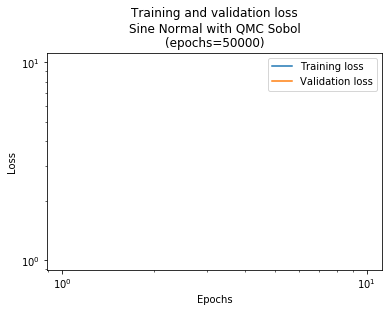

Best network index: 0
Total learning time took: 792 s


#########################################################################
#Sine Normal with QMC Sobol_SGD_mean_squared_error_ts_128_bs_128_network#
#########################################################################
-----  ----  ----------
Layer  Size  Parameters
0      48    336
1      48    2352
2      48    2352
3      48    2352
4      48    2352
5      48    2352
6      48    2352
7      48    2352
8      48    2352
9      48    2352
10     48    2352
11     48    2352
12     48    2352
13     48    2352
14     48    2352
15     48    2352
16     48    2352
17     48    2352
18     48    2352
19     48    2352
20     48    2352
21     48    2352
22     48    2352
23     48    2352
24     48    2352
25     48    2352
26     48    2352
27     48    2352
28     48    2352
29     48    2352
30     48    2352
31     48    2352
32     1     49
Sum          73297
-----  ----  ----------
########################################

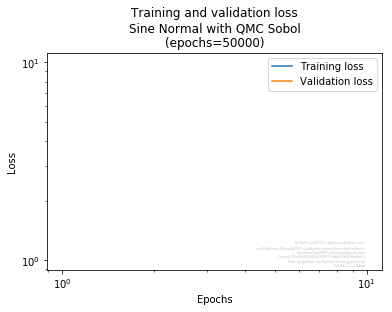

(32768,)
(32768, 1)
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


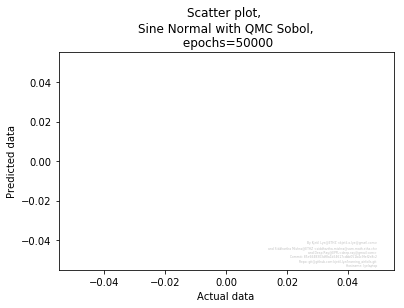

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_793 (Dense)            (None, 48)                336       
_________________________________________________________________
dense_794 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_795 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_796 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_797 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_798 (Dense)            (None, 48)                2352      
_________________________________________________________________
dense_799 (Dense)            (None, 48)                2352      
__________

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [4]:
for data_source_name in data_sources.keys():
   
    for functional_name in functionals.keys():
        parameters = data_sources[data_source_name]
        functional = functionals[functional_name]
        
        samples = functional(parameters)
        title = '{} with {}'.format(functional_name, data_source_name)
        
        train(parameters=parameters, samples=samples, title=title)
   